# 0 - Notes point mentor

## Notes du 16 novembre 2019
- retirer la Chine
- expliquer qu'on prend l'hypothese des donnees de 2013 et on utilise 2018 uniquement pour l'evaluation de la croissance

- controle totale generale totale vegetal et animal si doublons
- pib par habitant au total ==> 

- Nettoyage du jeu de donnees: faire attention a la reduction / harmonisation des donnees
- Nettoyage du jeu de donnees: verifier les valeurs extremes manquantes

## Notes du 23 novembre
1. Avancées de l’étudiant sur son projet depuis la dernière session :

Un premier nettoyage du jeu de données (contenant des variables supplémentaires) a été effectué et les données ont été centrées et réduites (i.e. standardisées). Les ratios ont été créés et une première version de la CAH a été produite.


2. Principaux sujets abordés pendant la session :

Les valeurs limites à identifier lorsque l'on crée des rations (valeur infinie, nulle ...).
Les fiches pays de la Coface qui concentrent un bon résumé de la situation économique, sociale et politique des pays.

3. Objectifs fixés par l'étudiant et le mentor pour la prochaine session :

Synthétiser la présentation des variables centrées/réduites au sein d'un boxplot commun.

Se renseigner sur les différents paramètres en input (critère ascendant ou descendant par exemple) ou output (quels types de stat descriptives) de la fonction Linkage () permettant de produire la CAH.
Effectuer une 2ème lecture du cours sur l'ACP pour assimiler les connaissances

## Notes du 8 decembre
- Faire ACH sur le cluster final
- QQplot sur le graphe pour comparer loi normale theorique et observee
- rajouter graphe loi normal avec moy et ecart type
- comparer plusieurs clusters
- rajouter les centroids sur le premier plan factoriel.



## Questions pour mentor
- pertinent de supprimer des pays qui sont en croissance negative ou inferieure a une certaine taille ?
- SUPPRIMER LA CHINE APRES AVOIR FAIT L ECHANTILLON


- FAIRE RATIO volailles sur les disp kcal et g
- Ajouter les exportations volailles
- Prendre uniquement PIB brut retirer l'autre


# 1 - Collecte des jeux de donnees

L'objectif est d'exporter du poulet sur de nouveaux territoires.
Aussi, une idee serait de cibler des pays qui:
- importent bcp de poulet,
- en produisent peu,
- connaissent une demographie en croissance ces dernieres annnees.

Dans ce cadre il sera donc interessant de collecter les donnees suivantes de la FAO comme suggere dans le texte d'encadrement du projet:

- Différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage.
- Proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays.
- Disponibilité alimentaire en protéines par habitant.
- Disponibilité alimentaire en calories par habitant.

Aussi nous procedons a l'extraction de donnees suivantes en restant sur des donnes globales et totales (pas par aliment ou type d'aliments).

## Population
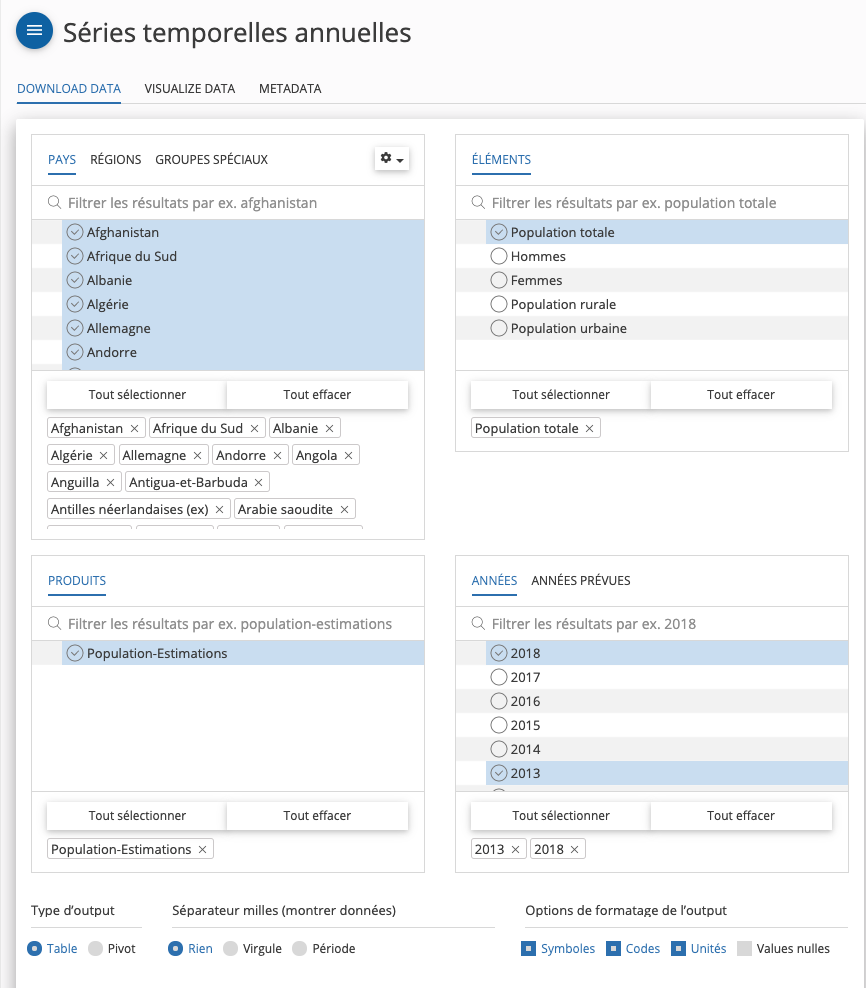

Dans les series temporelles de population il nous est ainsi possible de recuperer pour l'ensemble des pays repertories, des estimations de la population concernant les annees 2013 et 2018. 2013 est choisi notamment pcq il s'agit d'une annee anterieure pour laquelle l'estimation est en fait recensee. Par ailleurs de nombreuses donnees que nous allons collecter sont datees de cette annee.


## Proportions de proteines animales
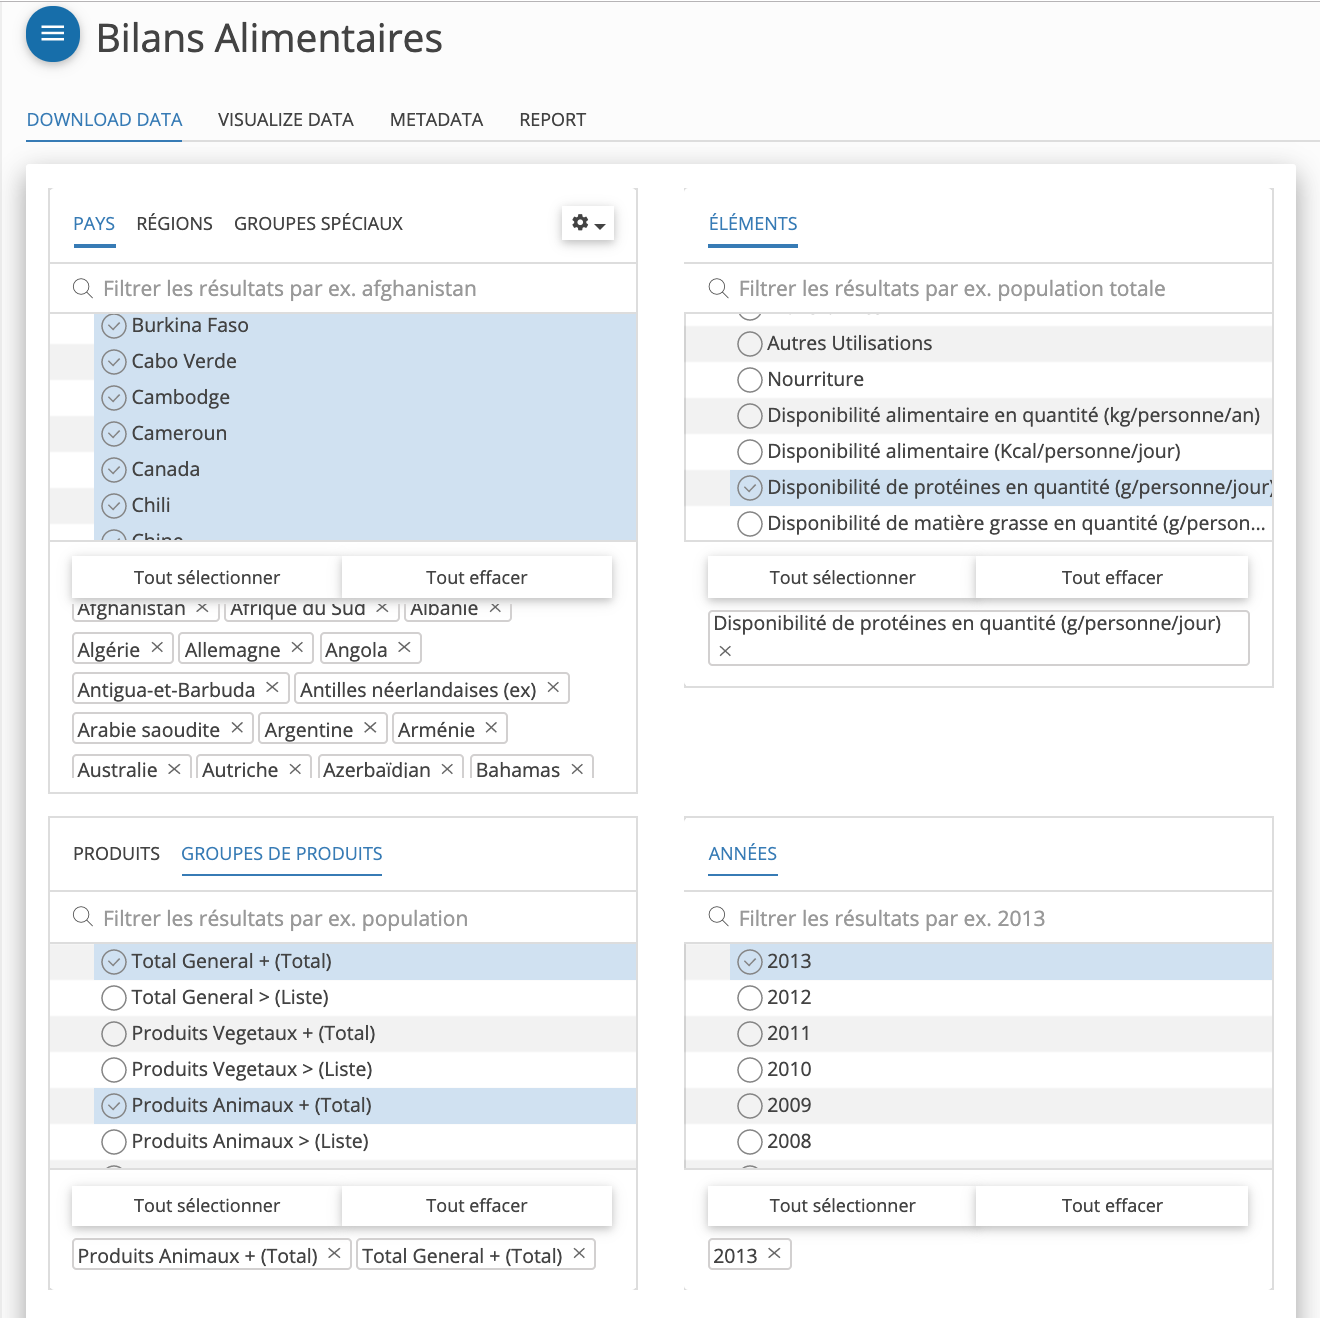

Afin d'evaluer la proportion de proteines d'origine animale par rapport a la quantite totale de proteines, on releve les donnees correspondant aux produits d'origines animales et celles de la categorie totales.

## Disponibilite alimentaires 
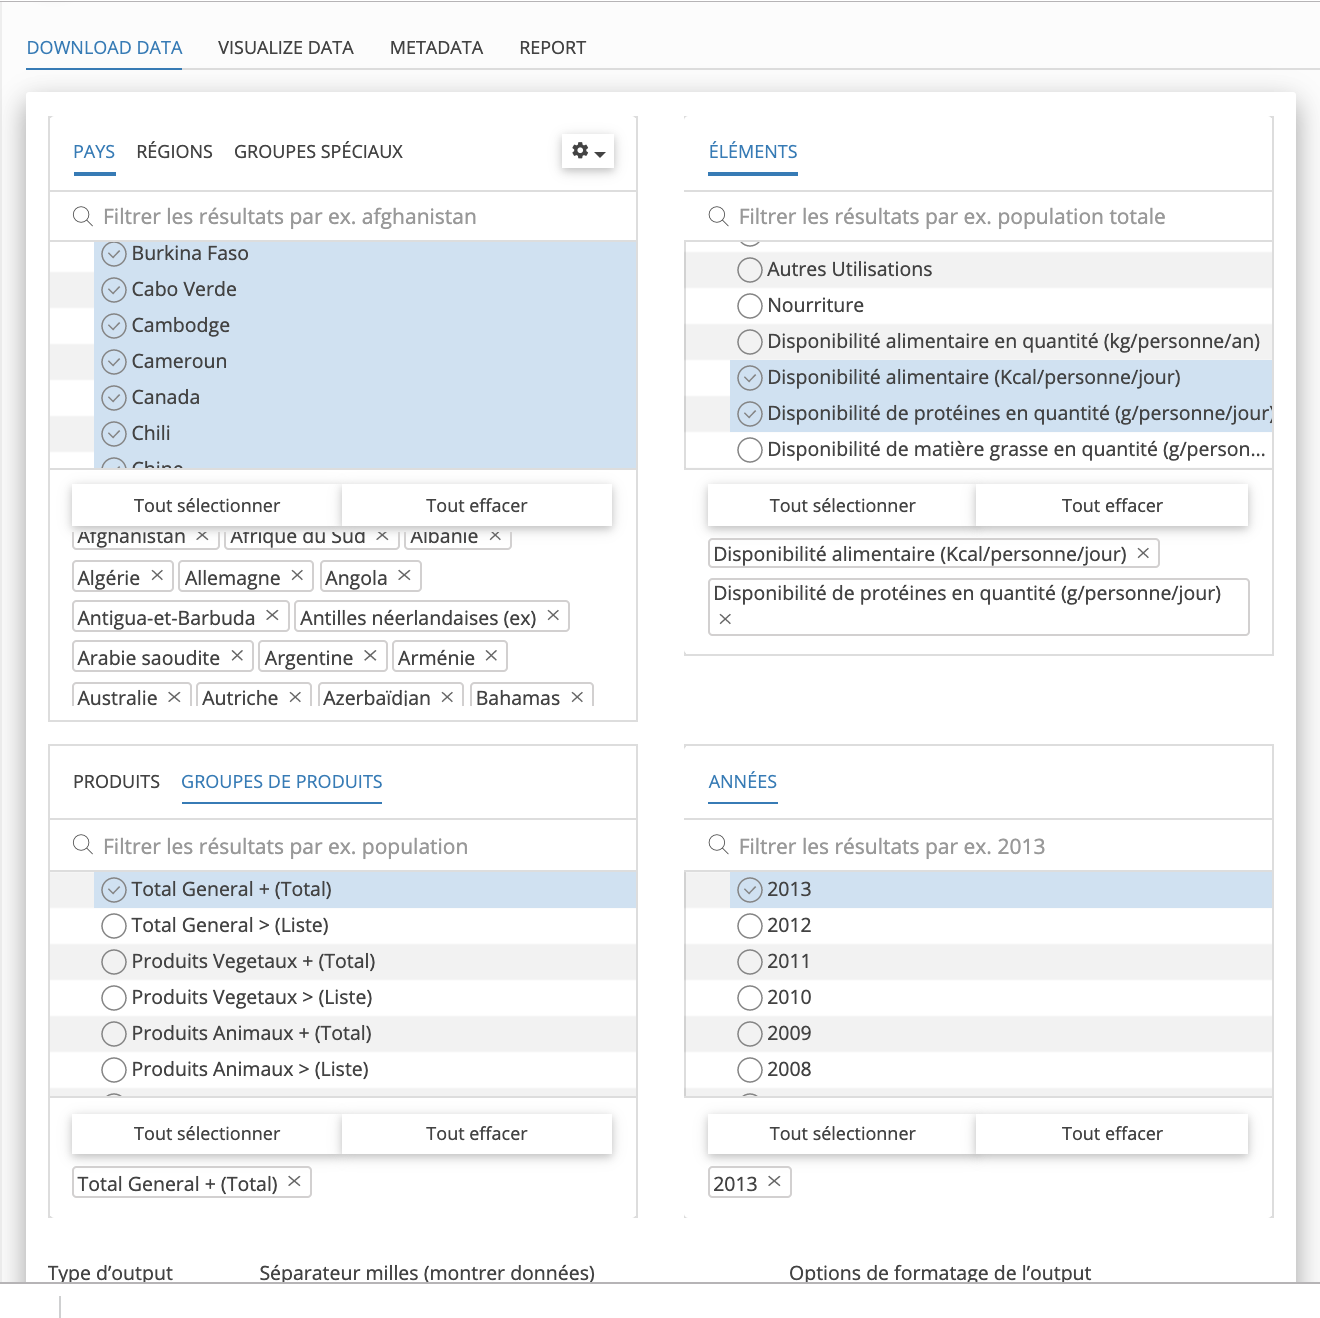

Pour les deux dernieres variables, sur l'ensemble des produits on collecte les elements disponibilite alimentaire en kcal par personne par jour et la disponibilite en proteines par personne par jour.

## Autres variables
Aussi nous enrichirons notre echantillon avec des donnees complementaires concernant notamment:
- la disponibilite alimentaire en proteines et kcal en volailles plus particulierement.
- les importations en volailles.
- les exportations en volailles.
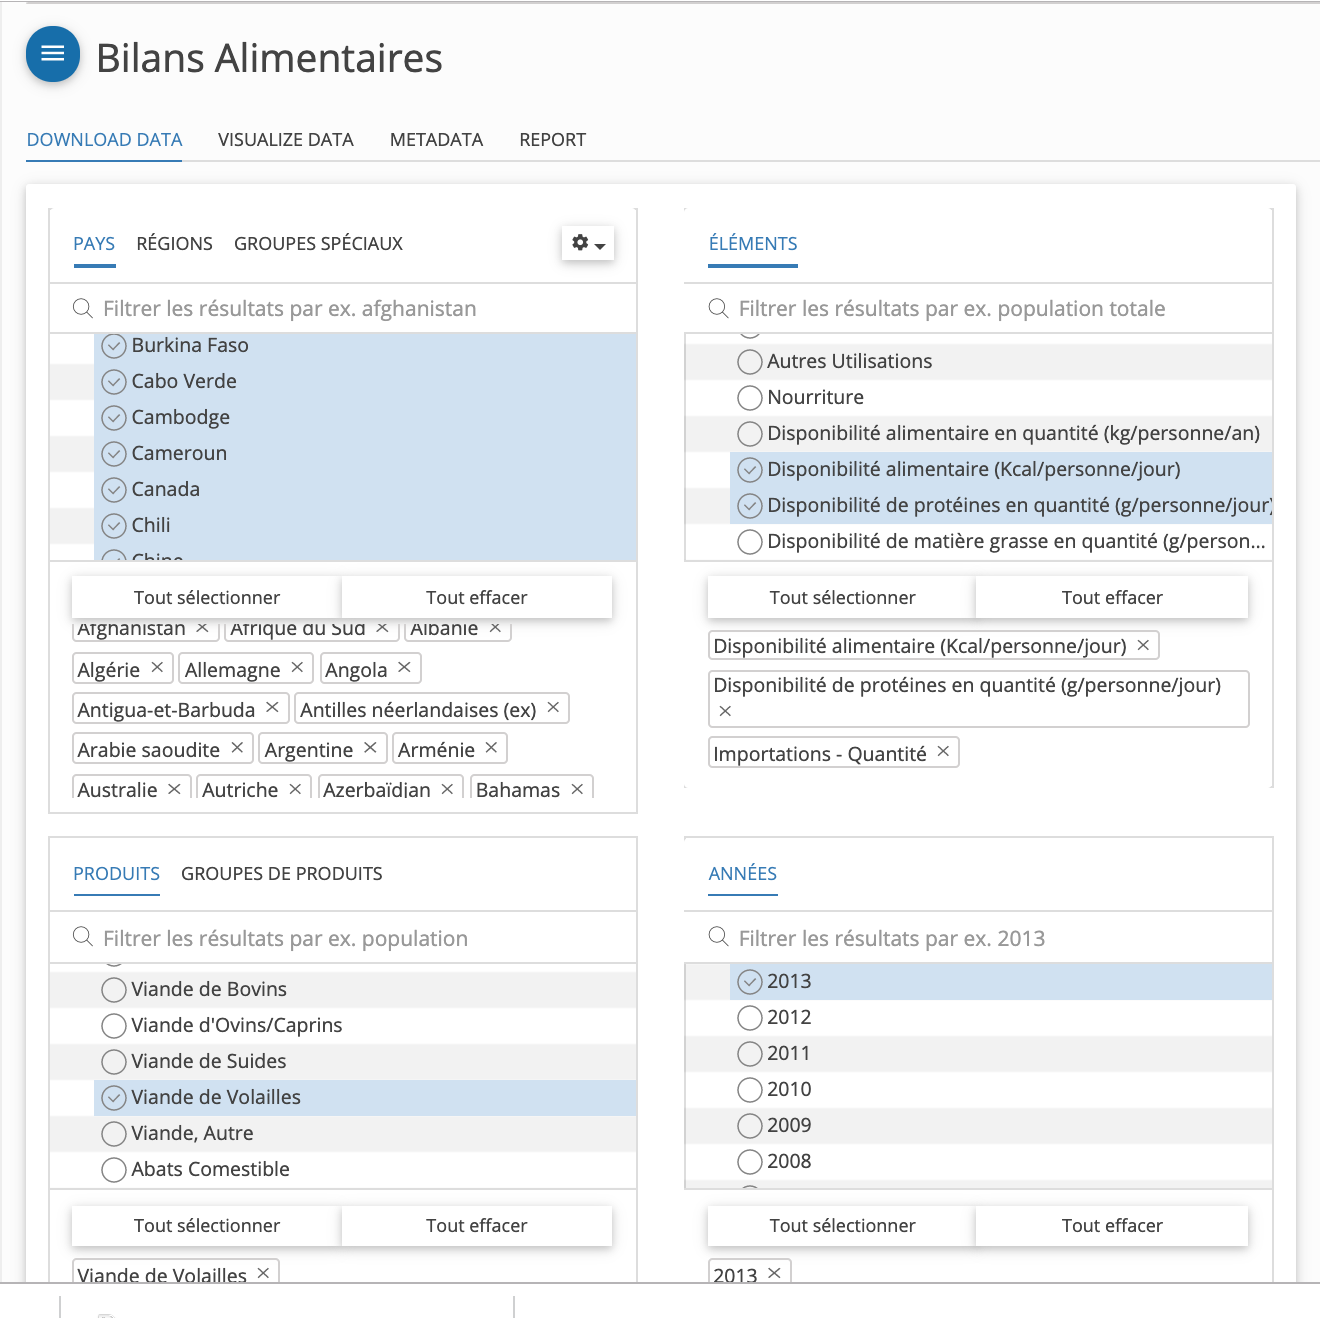
- le PIB brut par habitant
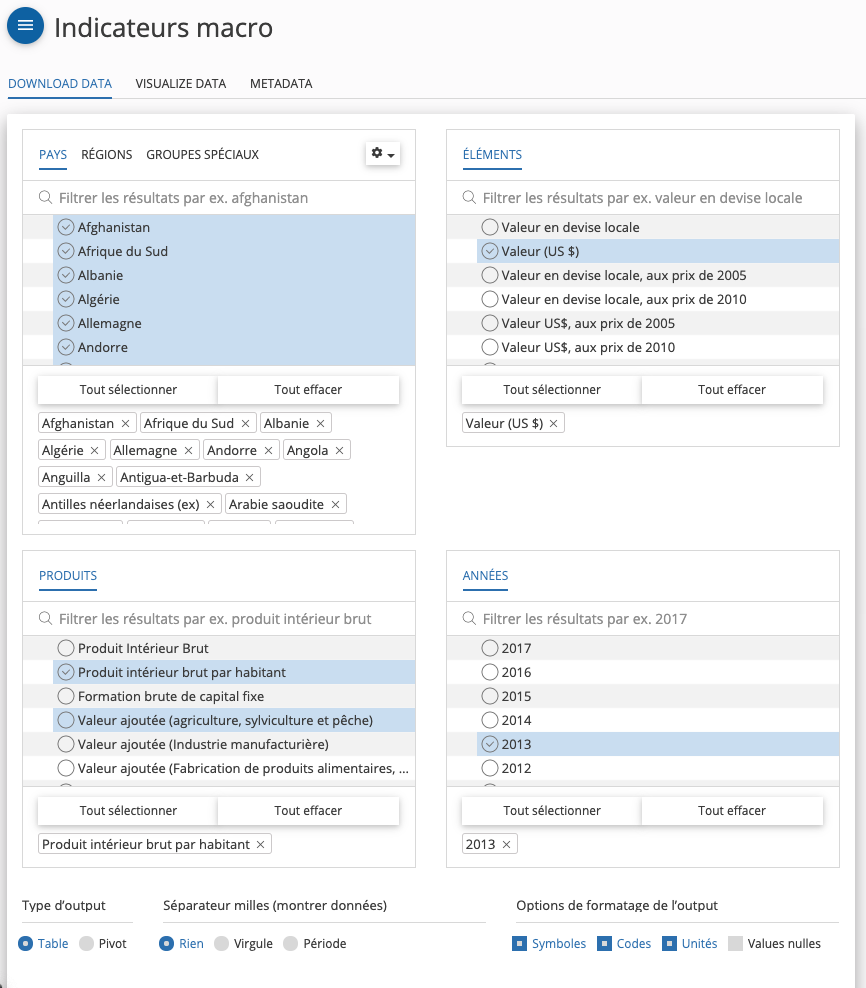

# 2- Consolidation des donnees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Chargement des donnees
df_population = pd.read_csv('FAOSTAT_population.csv')
df_dispo_proteines = pd.read_csv('FAOSTAT_dispo_proteines.csv')
df_dispo_alimentaire = pd.read_csv('FAOSTAT_dispo_alimentaire.csv')
df_pib_hab = pd.read_csv('FAOSTAT_pib_hab.csv')
df_volailles = pd.read_csv('FAOSTAT_data_volailles.csv')

## variable difference de population

Cette variable nous permet d'identifier des populations en croissance demographique positive. Avec une population en croissance demographique, les besoins peuvent grandir. Un bon indicateur pour notre etude ou nous souhaitons adresser ces nouveaux besoins.

In [3]:
# On renomme les colonnes
df_population.columns = ['domain_id', 'domain', 'id', 'country', 'elt_id', 'elt','product_id', 'product', 'year_id', 'year', 'unit', 'value', 'symbol', 'symbol_desc', 'note']
# On affiche les premieres lignes pour reference et controle
df_population.head(2)


,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc,note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,32269.589,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN


In [4]:
df_population.shape

(474, 15)

In [5]:
# On verifie que la Chine est encore presente en doublon
df_population.loc[df_population['country'].str.contains("Chine")]

,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc,note
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,1422971.062,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1459377.612,A,"Agrégat, peut inclure des données officielles,...",NaN
84,OA,Séries temporelles annuelles,96,Chine - RAS de Hong-Kong,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,7088.778,X,Sources internationales sûres,NaN
85,OA,Séries temporelles annuelles,96,Chine - RAS de Hong-Kong,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,7371.730,X,Sources internationales sûres,NaN
86,OA,Séries temporelles annuelles,128,Chine - RAS de Macao,511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,577.372,X,Sources internationales sûres,NaN
87,OA,Séries temporelles annuelles,128,Chine - RAS de Macao,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,631.636,X,Sources internationales sûres,NaN
88,OA,Séries temporelles annuelles,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,1391883.330,X,Sources internationales sûres,NaN
89,OA,Séries temporelles annuelles,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1427647.786,X,Sources internationales sûres,NaN
90,OA,Séries temporelles annuelles,214,"Chine, Taiwan Province de",511,Population totale,3010,Population-Estimations,2013,2013,1000 personnes,23421.582,X,Sources internationales sûres,NaN
91,OA,Séries temporelles annuelles,214,"Chine, Taiwan Province de",511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,23726.460,X,Sources internationales sûres,NaN


In [6]:
# On supprime cette entree que l'on sait en doublon
df_population.drop(df_population[df_population['country']=='Chine'].index, inplace=True)
df_population.shape

(472, 15)

In [7]:
# On pivote la table pour calculer le taux de croissance entre 2018 et 2013
df_diff_pop = df_population.pivot_table(index= ['id', 'country'], columns='year', values=('value'), aggfunc=(lambda x: x * 1000))
df_diff_pop['pop_growth'] = 100 * (df_diff_pop[2018] - df_diff_pop[2013])/ df_diff_pop[2013]
# On supprime les donnees relatives a la population
df_diff_pop.drop([2013, 2018], axis='columns', inplace=True)
negative_demographic_mask = df_diff_pop['pop_growth'] <= 0
df_diff_pop.loc[negative_demographic_mask]

,year,pop_growth
id,country,
3,Albanie,-0.724915
5,Samoa américaines,-0.445138
6,Andorre,-4.664867
17,Bermudes,-2.531606
27,Bulgarie,-3.271291
47,Îles Cook,-1.766388
73,Géorgie,-1.130214
80,Bosnie-Herzégovine,-6.172885
84,Grèce,-2.032066


On pourrait se dire qu'il faudrait supprimer de l'etude les pays en croissance demographique mais on se priverait de pays comme le Japon et la Roumanie... Donc peut etre pas. En revanche on pourrait filtrer certains pays trop petits ?

In [8]:
df_diff_pop['pop_growth'] = df_diff_pop['pop_growth'].apply(lambda x: float("%.2f" % x))
df_diff_pop

,year,pop_growth
id,country,
1,Arménie,1.87
2,Afghanistan,15.19
3,Albanie,-0.72
4,Algérie,10.72
5,Samoa américaines,-0.45
...,...,...
279,Curaçao,3.80
280,Sint Maarten (Partie Néerlandaise),11.59
281,Saint-Martin (Partie française),2.22


## Proportion proteines

In [9]:
df_dispo_proteines.columns = ['domain_id', 'domain', 'id', 'country', 'elt_id', 'elt','product_id', 'product', 'year_id', 'year', 'unit', 'value', 'symbol', 'symbol_desc']
df_dispo_proteines.head(2)

,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc
0,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,58.25,Fc,Donnée calculée
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2941,Produits Animaux,2013,2013,g/personne/jour,12.22,Fc,Donnée calculée


In [10]:
df_dispo_proteines.shape

(350, 14)

In [11]:
df_animal_prot_ratio = df_dispo_proteines.pivot_table(index=['id', 'country'], columns='product', values='value')
df_animal_prot_ratio['animal_prot_ratio'] = 100 * df_animal_prot_ratio['Produits Animaux'] / df_animal_prot_ratio['Total General']
df_animal_prot_ratio.drop(['Produits Animaux', 'Total General'], axis='columns', inplace=True)
df_animal_prot_ratio['animal_prot_ratio'] = df_animal_prot_ratio['animal_prot_ratio'].apply(lambda x: float("%.2f" % x))

In [12]:
df_animal_prot_ratio.shape

(175, 1)

In [13]:
df_animal_prot_ratio.head(2)

,product,animal_prot_ratio
id,country,
1,Arménie,48.03
2,Afghanistan,20.98


In [14]:
# On verifie la validite des donnees pour le ratio
check_mask = (df_animal_prot_ratio['animal_prot_ratio'] < 0) | (df_animal_prot_ratio['animal_prot_ratio'] > 1)
df_animal_prot_ratio.loc[check_mask]

,product,animal_prot_ratio
id,country,
1,Arménie,48.03
2,Afghanistan,20.98
3,Albanie,53.33
4,Algérie,27.17
7,Angola,32.13
...,...,...
256,Luxembourg,63.33
272,Serbie,48.56
273,Monténégro,56.31


In [15]:
df_animal_tmp = df_animal_prot_ratio.reset_index()
df_animal_tmp.loc[df_animal_tmp['country'].str.contains("États-Unis d'Amérique", regex=True)]

product,id,country,animal_prot_ratio
159,231,États-Unis d'Amérique,63.67


Donnees coherentes comprises entre 0 et 1

## Disponibilites alimentaires (proteines et energie)

In [16]:
df_dispo_alimentaire.columns = ['domain_id', 'domain', 'id', 'country', 'elt_id', 'elt','product_id', 'product', 'year_id', 'year', 'unit', 'value', 'symbol', 'symbol_desc']
df_dispo_alimentaire.head(2)

,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc
0,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2901,Total General,2013,2013,Kcal/personne/jour,2090.00,Fc,Donnée calculée
1,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2901,Total General,2013,2013,g/personne/jour,58.25,Fc,Donnée calculée


In [17]:
df_dispo_alim = df_dispo_alimentaire.pivot_table(index=['id', 'country'], columns='elt_id', values='value')
df_dispo_alim.columns = ['disp_kcal_aper_aday', 'disp_g_aper_aday']
df_dispo_alim.head(3)


,,disp_kcal_aper_aday,disp_g_aper_aday
id,country,,
1,Arménie,2928.0,90.04
2,Afghanistan,2090.0,58.25
3,Albanie,3193.0,111.42


## PIB brut par habitant

In [18]:
df_pib_hab.columns = ['domain_id', 'domain', 'id', 'country', 'elt_id', 'elt','product_id', 'product', 'year_id', 'year', 'unit', 'value', 'symbol', 'symbol_desc', 'note']
df_pib_hab.head(2)

,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc,note
0,MK,Indicateurs macro,2,Afghanistan,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2013,2013,NaN,681.034215,Fc,Donnée calculée,NaN
1,MK,Indicateurs macro,202,Afrique du Sud,6119,Valeur (US $),22014,Produit intérieur brut par habitant,2013,2013,NaN,6819.093360,Fc,Donnée calculée,NaN


In [19]:
df_pib_hab = df_pib_hab.pivot_table(index=['id', 'country'], columns='elt_id', values='value')
df_pib_hab.columns = ['pib_hab']
df_pib_hab.head(3)

,,pib_hab
id,country,
1,Arménie,3843.590751
2,Afghanistan,681.034215
3,Albanie,4376.970549


## Volailles donnees

In [20]:
df_volailles.columns = ['domain_id', 'domain', 'id', 'country', 'elt_id', 'elt','product_id', 'product', 'year_id', 'year', 'unit', 'value', 'symbol', 'symbol_desc']
df_volailles.head(6)

,domain_id,domain,id,country,elt_id,elt,product_id,product,year_id,year,unit,value,symbol,symbol_desc
0,FBS,Bilans Alimentaires,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,48.00,S,Données standardisées
1,FBS,Bilans Alimentaires,2,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2013,2013,Kcal/personne/jour,9.00,Fc,Donnée calculée
2,FBS,Bilans Alimentaires,2,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2013,2013,g/personne/jour,0.87,Fc,Donnée calculée
3,FBS,Bilans Alimentaires,202,Afrique du Sud,5611,Importations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,356.00,S,Données standardisées
4,FBS,Bilans Alimentaires,202,Afrique du Sud,5911,Exportations - Quantité,2734,Viande de Volailles,2013,2013,Milliers de tonnes,54.00,S,Données standardisées
5,FBS,Bilans Alimentaires,202,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2013,2013,Kcal/personne/jour,151.00,Fc,Donnée calculée


In [21]:
df_data_volailles = df_volailles.pivot_table(index=['id', 'country'], columns=['elt_id'], values='value')
df_data_volailles.columns = ['dispo_kcal_aper_aday', 'dispo_prot_g_aper_aday', 'importations_ktons', 'exportations_ktons']
df_data_volailles.head(3)

,,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
id,country,,,,
1,Arménie,45.0,4.51,32.0,0.0
2,Afghanistan,9.0,0.87,48.0,NaN
3,Albanie,67.0,4.94,25.0,0.0


In [22]:
df_data_volailles.describe()

,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
count,175.000000,175.000000,174.000000,148.000000
mean,74.822857,7.128000,97.770115,122.087838
std,61.625841,5.678683,238.125566,496.481634
min,1.000000,0.140000,0.000000,0.000000
25%,20.000000,2.030000,2.000000,0.000000
50%,63.000000,6.480000,16.000000,1.500000
75%,105.000000,10.665000,73.000000,25.250000
max,293.000000,25.780000,1903.000000,4086.000000


In [23]:
df_na = df_data_volailles[df_data_volailles.isna().any(axis=1)]
df_na

,,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
id,country,,,,
2,Afghanistan,9.0,0.87,48.0,NaN
16,Bangladesh,6.0,0.44,0.0,NaN
17,Bermudes,108.0,12.10,4.0,NaN
25,Îles Salomon,11.0,1.14,2.0,NaN
28,Myanmar,83.0,7.15,1.0,NaN
37,République centrafricaine,5.0,0.49,1.0,NaN
55,Dominique,131.0,10.20,4.0,NaN
72,Djibouti,7.0,0.69,2.0,NaN
83,Kiribati,53.0,5.51,1.0,NaN


In [24]:
df_na.shape

(27, 4)

In [25]:
nan_mask = df_data_volailles['exportations_ktons'].isna()
df_data_volailles.loc[nan_mask, 'exportations_ktons'] = 0

In [26]:
df_data_volailles

,,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
id,country,,,,
1,Arménie,45.0,4.51,32.0,0.0
2,Afghanistan,9.0,0.87,48.0,0.0
3,Albanie,67.0,4.94,25.0,0.0
4,Algérie,26.0,2.28,3.0,0.0
7,Angola,58.0,5.84,342.0,0.0
...,...,...,...,...,...
256,Luxembourg,75.0,7.65,10.0,1.0
272,Serbie,37.0,3.61,12.0,4.0
273,Monténégro,53.0,5.51,7.0,0.0


# 3 - Tests et netttoyage des donnees

In [27]:
#Ci-dessous les donnees a disposition:
data_lst = [
    df_diff_pop.shape,
    df_animal_prot_ratio.shape,
    df_dispo_alim.shape,
    df_pib_hab.shape,
    df_data_volailles.shape,
]
data_lst

[(236, 1), (175, 1), (175, 2), (211, 1), (175, 4)]

In [28]:
df_tmp = df_pib_hab.reset_index()
df_tmp.loc[df_tmp['id']==231]

,id,country,pib_hab
188,231,États-Unis d'Amérique,53194.611837


On observe une grande disparites des pays entre nos differents jeux de donnees. 

In [29]:
df_data = pd.merge(df_diff_pop, df_animal_prot_ratio, on=['id', 'country'], how='right') # on elimine les pays dont on a pas d'info en termes de dispo
df_data = df_data.merge(df_dispo_alim, on=['id', 'country'], how='left')
df_data = df_data.merge(df_pib_hab, on=['id', 'country'], how='left')
df_data = df_data.merge(df_data_volailles, on=['id', 'country'], how='right')


In [30]:
df_data

,,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
id,country,,,,,,,,,
1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,45.0,4.51,32.0,0.0
2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,9.0,0.87,48.0,0.0
3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,67.0,4.94,25.0,0.0
4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,26.0,2.28,3.0,0.0
7,Angola,18.43,32.13,2473.0,57.26,5258.408495,58.0,5.84,342.0,0.0
...,...,...,...,...,...,...,...,...,...,...
256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,75.0,7.65,10.0,1.0
272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,37.0,3.61,12.0,4.0
273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,53.0,5.51,7.0,0.0


on doit retirer la Chine et la France

In [31]:
df1 = df_data[df_data.isna().any(axis=1)]
df1

,,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
id,country,,,,,,,,,
116,République populaire démocratique de Corée,2.49,18.31,2094.0,55.00,666.272365,8.0,0.55,NaN,0.0
214,"Chine, Taiwan Province de",1.30,48.46,2997.0,89.74,NaN,124.0,10.69,116.0,7.0
351,Chine,NaN,40.43,3108.0,98.04,NaN,65.0,4.45,1903.0,1377.0


In [32]:
df1.shape

(3, 9)

Apres verification avec les chiffres de la population mondiale on identifie le pays avec l'ID 116 comme etant la coree du Nord. Les importations en volailles ne sont pas connues.

Pour l'instant on privilegie les donnees sur les 4 variables que sont  diff_personnes, animal_prot_ratio, disp_kcal et disp_g

In [33]:
df_data = df_data.reset_index()

In [34]:
df_data.drop(df_data[df_data['country']=='Chine'].index, inplace=True) # Doublon des pays
df_data.drop(df_data[df_data['country']=='France'].index, inplace=True) # pas besoin d'etudier la France
df_data.drop(df_data[df_data['id']==116].index, inplace=True) # Retrait de la Coree du Nord
df_data

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons
0,1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,45.0,4.51,32.0,0.0
1,2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,9.0,0.87,48.0,0.0
2,3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,67.0,4.94,25.0,0.0
3,4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,26.0,2.28,3.0,0.0
4,7,Angola,18.43,32.13,2473.0,57.26,5258.408495,58.0,5.84,342.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
169,255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,43.0,4.36,252.0,498.0
170,256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,75.0,7.65,10.0,1.0
171,272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,37.0,3.61,12.0,4.0
172,273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,53.0,5.51,7.0,0.0


In [35]:
df_data['volailles_kcal_ratio'] = 100 * df_data['dispo_kcal_aper_aday'] / df_data['disp_kcal_aper_aday']
df_data['volailles_prot_ratio'] = 100 * df_data['dispo_prot_g_aper_aday'] / df_data['disp_g_aper_aday']
df_data['volailles_imp_exp'] = df_data['importations_ktons'] - df_data['exportations_ktons']
df_data

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
0,1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,45.0,4.51,32.0,0.0,1.536885,5.008885,32.0
1,2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,9.0,0.87,48.0,0.0,0.430622,1.493562,48.0
2,3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,67.0,4.94,25.0,0.0,2.098340,4.433674,25.0
3,4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,26.0,2.28,3.0,0.0,0.788835,2.479339,3.0
4,7,Angola,18.43,32.13,2473.0,57.26,5258.408495,58.0,5.84,342.0,0.0,2.345330,10.199092,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,43.0,4.36,252.0,498.0,1.151889,4.377950,-246.0
170,256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,75.0,7.65,10.0,1.0,2.119243,6.717597,9.0
171,272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,37.0,3.61,12.0,4.0,1.356305,4.390659,8.0
172,273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,53.0,5.51,7.0,0.0,1.518190,4.916570,7.0


In [36]:
df_data['volailles_kcal_ratio'] = df_data['volailles_kcal_ratio'].apply(lambda x: float("%.2f" % x))
df_data['volailles_prot_ratio'] = df_data['volailles_prot_ratio'].apply(lambda x: float("%.2f" % x))
df_data

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,dispo_kcal_aper_aday,dispo_prot_g_aper_aday,importations_ktons,exportations_ktons,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
0,1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,45.0,4.51,32.0,0.0,1.54,5.01,32.0
1,2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,9.0,0.87,48.0,0.0,0.43,1.49,48.0
2,3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,67.0,4.94,25.0,0.0,2.10,4.43,25.0
3,4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,26.0,2.28,3.0,0.0,0.79,2.48,3.0
4,7,Angola,18.43,32.13,2473.0,57.26,5258.408495,58.0,5.84,342.0,0.0,2.35,10.20,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,43.0,4.36,252.0,498.0,1.15,4.38,-246.0
170,256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,75.0,7.65,10.0,1.0,2.12,6.72,9.0
171,272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,37.0,3.61,12.0,4.0,1.36,4.39,8.0
172,273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,53.0,5.51,7.0,0.0,1.52,4.92,7.0


In [37]:
df_data.drop(['dispo_kcal_aper_aday', 'dispo_prot_g_aper_aday', 'importations_ktons', 'exportations_ktons'], axis='columns', inplace=True)
df_data

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
0,1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0
1,2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0
2,3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0
3,4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0
4,7,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0
...,...,...,...,...,...,...,...,...,...,...
169,255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,1.15,4.38,-246.0
170,256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0
171,272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,1.36,4.39,8.0
172,273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,1.52,4.92,7.0


In [38]:
df_data.shape

(172, 10)

In [39]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 173
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    172 non-null    int64  
 1   country               172 non-null    object 
 2   pop_growth            172 non-null    float64
 3   animal_prot_ratio     172 non-null    float64
 4   disp_kcal_aper_aday   172 non-null    float64
 5   disp_g_aper_aday      172 non-null    float64
 6   pib_hab               171 non-null    float64
 7   volailles_kcal_ratio  172 non-null    float64
 8   volailles_prot_ratio  172 non-null    float64
 9   volailles_imp_exp     172 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 14.8+ KB


On verifie les donnnes de chaque variable pour tracker les outliers

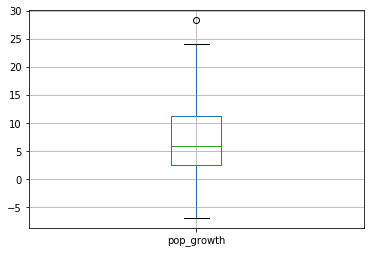

In [40]:
df_data.boxplot(column=['pop_growth'])

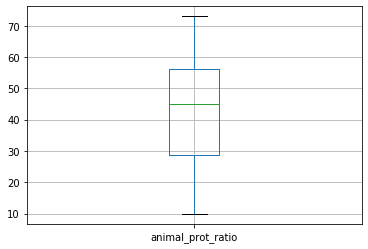

In [41]:
df_data.boxplot(column=['animal_prot_ratio'])

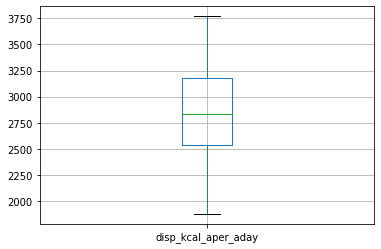

In [42]:
df_data.boxplot(column=['disp_kcal_aper_aday'])

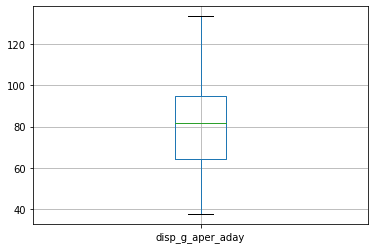

In [43]:
df_data.boxplot(column=['disp_g_aper_aday'])


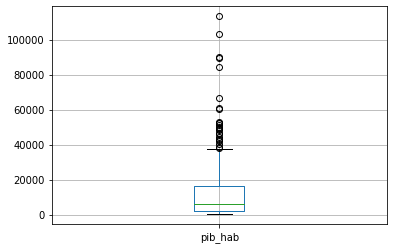

In [44]:
df_data.boxplot(column=['pib_hab'])

En revanche on ne retire pas les outliers pour les pib par habitant car cela nous permet d'identifier des pays riches.


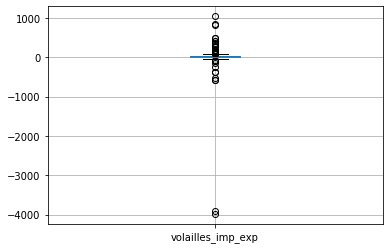

In [45]:
df_data.boxplot(column=['volailles_imp_exp'])

In [46]:
outliers_imp_exp = df_data['volailles_imp_exp'] < -1000
df_data.loc[outliers_imp_exp]

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
15,21,Brésil,4.19,55.36,3263.0,94.99,12216.965936,5.88,15.33,-3899.0
159,231,États-Unis d'Amérique,3.38,63.67,3682.0,109.60,53194.611837,5.35,16.37,-3985.0


Ici on retire ces outliers car ils seront ecartes de notre etude quoiqu'il arrive


In [47]:
df_data.drop(df_data[outliers_imp_exp].index, inplace=True)
df_data

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
0,1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0
1,2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0
2,3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0
3,4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0
4,7,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0
...,...,...,...,...,...,...,...,...,...,...
169,255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,1.15,4.38,-246.0
170,256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0
171,272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,1.36,4.39,8.0
172,273,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,1.52,4.92,7.0


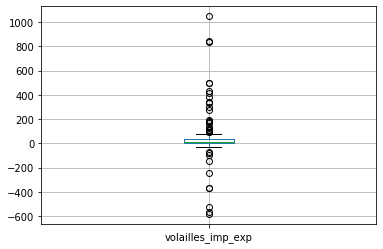

In [48]:
df_data.boxplot(column=['volailles_imp_exp'])

Des outliers a regarder au niveau du PIB / habitant

In [49]:
ratios = ['pop_growth', 'animal_prot_ratio', 'volailles_kcal_ratio', 'volailles_prot_ratio']
for ratio in ratios:
    infinite_mask = ~np.isfinite(df_data[ratio])
    print(df_data.loc[infinite_mask])

Empty DataFrame
Columns: [id, country, pop_growth, animal_prot_ratio, disp_kcal_aper_aday, disp_g_aper_aday, pib_hab, volailles_kcal_ratio, volailles_prot_ratio, volailles_imp_exp]
Index: []
Empty DataFrame
Columns: [id, country, pop_growth, animal_prot_ratio, disp_kcal_aper_aday, disp_g_aper_aday, pib_hab, volailles_kcal_ratio, volailles_prot_ratio, volailles_imp_exp]
Index: []
Empty DataFrame
Columns: [id, country, pop_growth, animal_prot_ratio, disp_kcal_aper_aday, disp_g_aper_aday, pib_hab, volailles_kcal_ratio, volailles_prot_ratio, volailles_imp_exp]
Index: []
Empty DataFrame
Columns: [id, country, pop_growth, animal_prot_ratio, disp_kcal_aper_aday, disp_g_aper_aday, pib_hab, volailles_kcal_ratio, volailles_prot_ratio, volailles_imp_exp]
Index: []


In [50]:
df_data.isna().any()

id                      False
country                 False
pop_growth              False
animal_prot_ratio       False
disp_kcal_aper_aday     False
disp_g_aper_aday        False
pib_hab                  True
volailles_kcal_ratio    False
volailles_prot_ratio    False
volailles_imp_exp       False
dtype: bool

In [51]:
na_mask = df_data['pib_hab'].isna()
df_data.loc[na_mask]

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
147,214,"Chine, Taiwan Province de",1.3,48.46,2997.0,89.74,NaN,4.14,11.91,109.0


In [52]:
china_mask = df_data['country'].str.contains('Chine.*', regex=True)
df_china = df_data.loc[china_mask]
df_china

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
28,41,"Chine, continentale",2.57,40.07,3108.0,98.02,6947.741982,2.03,4.35,20.0
63,96,Chine - RAS de Hong-Kong,3.99,73.08,3290.0,129.18,38566.712121,5.99,15.16,380.0
91,128,Chine - RAS de Macao,9.40,64.42,2915.0,94.84,89525.344880,4.97,12.70,17.0
147,214,"Chine, Taiwan Province de",1.30,48.46,2997.0,89.74,NaN,4.14,11.91,109.0


In [53]:

df_china['pib_hab'][:3].mean()

45013.266327666664

In [54]:
# ATTENTION IMPUTATION pour Taiwan
df_data.loc[na_mask, 'pib_hab'] = 45013
df_china = df_data.loc[china_mask]
df_china

,id,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
28,41,"Chine, continentale",2.57,40.07,3108.0,98.02,6947.741982,2.03,4.35,20.0
63,96,Chine - RAS de Hong-Kong,3.99,73.08,3290.0,129.18,38566.712121,5.99,15.16,380.0
91,128,Chine - RAS de Macao,9.40,64.42,2915.0,94.84,89525.344880,4.97,12.70,17.0
147,214,"Chine, Taiwan Province de",1.30,48.46,2997.0,89.74,45013.000000,4.14,11.91,109.0


# Realisations d'une CAH


In [55]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn import preprocessing

In [56]:
# On redefinit les index pour n'avoir que des colonnes avec des valeurs numeriques
df_data_2 = df_data.set_index(['id', 'country'])
df_data_2

,,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
id,country,,,,,,,,
1,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0
2,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0
3,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0
4,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0
7,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0
...,...,...,...,...,...,...,...,...,...
255,Belgique,2.94,58.36,3733.0,99.59,46713.438406,1.15,4.38,-246.0
256,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0
272,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,1.36,4.39,8.0


In [57]:
# Collecte de l'index pour recomposer un data frame apres centrage, reduction et clusterisation
countries = [elt[1] for elt in df_data_2.index]
countries

['Arménie',
 'Afghanistan',
 'Albanie',
 'Algérie',
 'Angola',
 'Antigua-et-Barbuda',
 'Argentine',
 'Australie',
 'Autriche',
 'Bahamas',
 'Barbade',
 'Bangladesh',
 'Bermudes',
 'Bolivie (État plurinational de)',
 'Botswana',
 'Belize',
 'Îles Salomon',
 'Brunéi Darussalam',
 'Bulgarie',
 'Myanmar',
 'Cameroun',
 'Canada',
 'Cabo Verde',
 'République centrafricaine',
 'Sri Lanka',
 'Tchad',
 'Chili',
 'Chine, continentale',
 'Colombie',
 'Congo',
 'Costa Rica',
 'Cuba',
 'Chypre',
 'Azerbaïdjan',
 'Bénin',
 'Danemark',
 'Dominique',
 'République dominicaine',
 'Bélarus',
 'Équateur',
 'Égypte',
 'El Salvador',
 'Estonie',
 'Fidji',
 'Finlande',
 'Polynésie française',
 'Djibouti',
 'Géorgie',
 'Gabon',
 'Gambie',
 'Allemagne',
 'Bosnie-Herzégovine',
 'Ghana',
 'Kiribati',
 'Grèce',
 'Grenade',
 'Guatemala',
 'Guinée',
 'Guyana',
 'Haïti',
 'Honduras',
 'Chine - RAS de Hong-Kong',
 'Hongrie',
 'Croatie',
 'Islande',
 'Inde',
 'Indonésie',
 "Iran (République islamique d')",
 'Iraq',
 '

In [58]:
len(countries)

170

In [59]:
# Centrage et reduction des donnees
X = df_data_2.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [60]:
Z = linkage(X_scaled, 'ward')

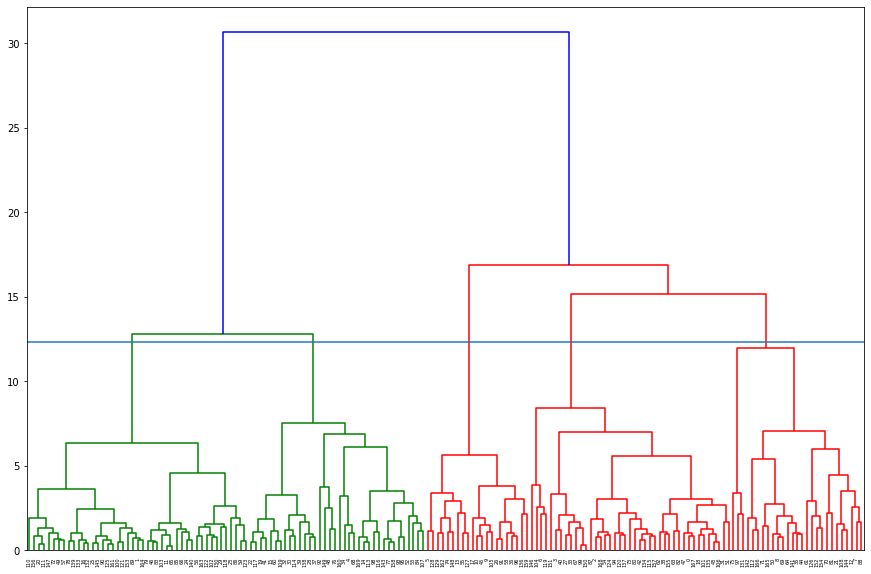

In [61]:
fig1_1 = plt.figure(figsize=(15, 10))
plt.axhline(12.3)
dendrogram(Z, labels=None)
plt.show()
fig1_1.savefig("figure_1_1_dendrogram.png")

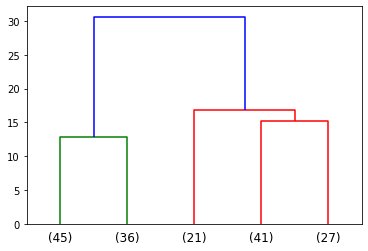

In [62]:
dendrogram(Z, truncate_mode='lastp', p=5)
plt.show()

In [63]:
clusters = fcluster(Z, 5, criterion='maxclust')
clusters

array([4, 1, 4, 4, 2, 3, 4, 5, 5, 3, 3, 1, 5, 3, 2, 2, 1, 3, 4, 2, 1, 5,
       2, 1, 1, 1, 3, 4, 2, 1, 2, 4, 2, 4, 2, 5, 3, 2, 4, 2, 4, 2, 4, 4,
       5, 3, 1, 4, 2, 1, 5, 4, 2, 2, 4, 3, 1, 1, 3, 1, 2, 5, 4, 4, 5, 1,
       1, 4, 2, 5, 5, 5, 1, 4, 3, 5, 2, 2, 1, 1, 4, 5, 4, 1, 2, 1, 1, 4,
       5, 1, 1, 3, 2, 2, 4, 2, 3, 5, 2, 4, 1, 4, 1, 1, 4, 3, 4, 2, 5, 2,
       1, 1, 5, 2, 2, 4, 2, 2, 1, 4, 4, 1, 1, 1, 4, 1, 5, 3, 3, 3, 1, 5,
       1, 1, 4, 4, 3, 4, 2, 1, 1, 5, 5, 2, 5, 1, 4, 1, 3, 2, 4, 4, 5, 1,
       5, 4, 1, 4, 2, 3, 2, 1, 3, 1, 1, 5, 5, 4, 4, 2], dtype=int32)

In [64]:
clusters_lst = clusters.tolist()
cluster_ids = list(set(clusters_lst))
cluster_ids
cluster_size = [ clusters_lst.count(cluster_id) for cluster_id in cluster_ids]

In [65]:
df_clusters = pd.DataFrame({'cluster': cluster_ids, 'cluster_size': cluster_size})
df_clusters

,cluster,cluster_size
0,1,45
1,2,36
2,3,21
3,4,41
4,5,27


In [66]:
# On reassocie les noms de pays avec leur numero de cluster
df_data_3 = pd.DataFrame({'country': countries, 'cluster': clusters})
df_data_3

,country,cluster
0,Arménie,4
1,Afghanistan,1
2,Albanie,4
3,Algérie,4
4,Angola,2
...,...,...
165,Belgique,5
166,Luxembourg,5
167,Serbie,4
168,Monténégro,4


In [67]:
df_data_4 = df_data_2.merge(df_data_3, on='country', how='left')
df_data_4.head(10)

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
0,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0,4
1,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0,1
2,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0,4
3,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0,4
4,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0,2
5,Antigua-et-Barbuda,5.21,67.89,2417.0,83.71,12194.549592,10.38,22.70,6.0,3
6,Argentine,5.13,65.22,3229.0,102.64,14417.421454,5.14,12.06,-364.0,4
7,Australie,7.07,67.44,3276.0,106.28,66544.670956,5.68,15.11,-21.0,5
8,Autriche,3.92,59.18,3768.0,106.21,50137.519579,1.75,7.22,38.0,5
9,Bahamas,5.03,65.15,2670.0,86.62,28303.366072,6.97,18.22,19.0,3


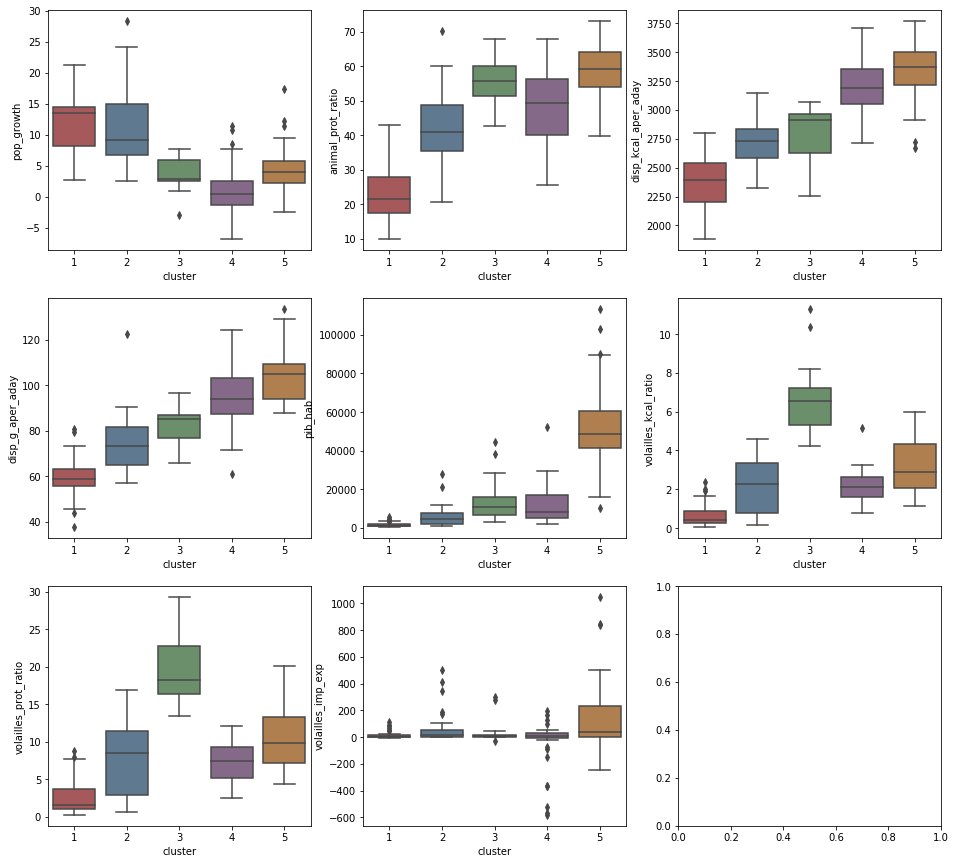

In [68]:
import seaborn as sns
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))

for f, ax in zip(df_data_4.loc[:,"pop_growth":"volailles_imp_exp"].columns, axes.ravel()):
        _ = sns.boxplot(
        data=df_data_4, 
        y=f, 
        x='cluster', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )

In [69]:
df_data_4.loc[df_data_4['country'] == 'Ets']

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster


In [70]:
cluster_col = df_data_4.columns[1:9]

In [71]:
df_cluster = df_data_4.pivot_table(index='cluster', aggfunc='mean')
df_cluster = df_cluster.merge(df_clusters, on='cluster', how='left')


In [72]:
df_cluster

,cluster,animal_prot_ratio,disp_g_aper_aday,disp_kcal_aper_aday,pib_hab,pop_growth,volailles_imp_exp,volailles_kcal_ratio,volailles_prot_ratio,cluster_size
0,1,23.035556,58.952667,2361.355556,1534.113208,11.676222,13.466667,0.654444,2.627778,45
1,2,42.023889,75.077222,2715.583333,5796.656924,10.819167,60.500000,2.198889,7.699167,36
2,3,55.311905,82.503810,2791.095238,14157.676479,3.592857,35.190476,6.592857,19.605238,21
3,4,47.547073,94.278293,3186.878049,12329.526138,1.170488,-40.317073,2.194390,7.393171,41
4,5,58.342222,104.962963,3329.518519,53264.680880,4.725556,169.888889,3.368519,10.782593,27


A regarder: https://www.coface.com/fr/Etudes-economiques-et-risque-pays/Chine

In [73]:
cluster1_mask = df_data_4['cluster'] == 1
cluster2_mask = df_data_4['cluster'] == 2
cluster3_mask = df_data_4['cluster'] == 3
cluster4_mask = df_data_4['cluster'] == 4
cluster5_mask = df_data_4['cluster'] == 5
#df_data_4.loc[cluster5_mask]

Regardons le cluster 4 qui se caracterise par une croissace demo faible, pibhab moyen, une balance imports/export negative et un faible ratio de dispo en volaille. Contient qd meme la Chine, mais le pays a peu de besoins en importation. Marche qui sera difficile a penetrer quoiqu'il arrive. Dans ce cluster on a Cuba, l'Egypte et le Khazakhstan qui ont de fortes importations en volailles. Le Khazakhstan est dans une region difficile d'acces potentiellement instable politiquement. L'Egypte est pauvre mais en tres faible croissance demo.

Le cluster 1 est caracterise par de fortes croissances demographique, une balance import export faible et a une faible dispo en volailles. Il concentre les pays pauvres. Il represente un groupe de pays dont les marches seront difficiles a penetrer avec une offre en poulet haute/moyenne gamme.

Le cluster 2 concerne egalement des pays pauvres et une dispo en volaille faible avec une forte croissance demo.

Le cluster 5 est le plus interessant: des pays riche en croissance moyenne avec de fortes importations et de fortes disponibilites de viandes de volailles.

Le cluster 3est interessant pcq une forte disponibilite en volaille et une bonne balance import export. Egalement une bonne croissance demo.

On choisit le cluster 5: cible ideale pour des produits moyenne / haut de gamme, dispo en volailles moyenne par rapport aux autres groupes, en croissance demo moyenne et surtout une balance import exports tres importantes

In [74]:
df_target=df_data_4.loc[cluster5_mask]
df_target.shape

(27, 10)

In [75]:
df_data_4.to_csv('cluster.csv')

Dans ce cluster on peut qd meme eliminer des pays dont la balance est tres negative comme la belgique et l'italie

In [76]:
df_target.drop(df_target[df_target['country']  == 'Italie'].index, inplace=True)
df_target.drop(df_target[df_target['country']  == 'Belgique'].index, inplace=True)
df_target.shape

/Users/ShaM/.local/share/virtualenvs/OCR_DA_proj5-zvG9ySIl/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(25, 10)

In [77]:
df_target.sort_values(by=['volailles_prot_ratio'], kind='heapsort')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
141,Suède,3.68,65.75,3179.0,107.72,60254.372213,1.95,6.67,57.0,5
166,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0,5
44,Finlande,1.54,62.04,3368.0,117.72,49659.588178,2.11,6.96,3.0,5
50,Allemagne,2.40,60.52,3499.0,101.59,46176.177749,1.86,7.15,112.0,5
142,Suisse,5.14,64.21,3391.0,93.08,84659.015399,1.68,7.16,52.0,5
8,Autriche,3.92,59.18,3768.0,106.21,50137.519579,1.75,7.22,38.0,5
112,Norvège,5.09,59.50,3485.0,110.90,103110.441896,2.07,7.72,2.0,5
75,Japon,-0.87,55.24,2726.0,87.73,40180.809978,2.35,7.92,1047.0,5
64,Islande,2.91,72.25,3380.0,133.54,49027.815665,2.72,8.15,1.0,5
126,Fédération de Russie,0.98,54.63,3361.0,102.84,15997.000015,2.74,9.01,500.0,5


In [78]:
df_target.sort_values(by='volailles_imp_exp', kind='heapsort')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
7,Australie,7.07,67.44,3276.0,106.28,66544.670956,5.68,15.11,-21.0,5
35,Danemark,2.02,64.13,3367.0,108.88,60942.805627,2.91,9.77,-21.0,5
108,Nouvelle-Zélande,4.97,59.23,3137.0,92.54,42232.040825,4.46,13.26,-12.0,5
70,Israël,8.36,56.56,3610.0,128.14,37452.126321,6.01,20.12,-8.0,5
64,Islande,2.91,72.25,3380.0,133.54,49027.815665,2.72,8.15,1.0,5
112,Norvège,5.09,59.50,3485.0,110.90,103110.441896,2.07,7.72,2.0,5
44,Finlande,1.54,62.04,3368.0,117.72,49659.588178,2.11,6.96,3.0,5
12,Bermudes,-2.53,66.39,2671.0,90.79,89968.618136,4.04,13.33,4.0,5
166,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0,5
88,Chine - RAS de Macao,9.40,64.42,2915.0,94.84,89525.344880,4.97,12.70,17.0,5


In [79]:
df_target.describe()

,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0
mean,4.955200,58.528400,3303.400000,105.036000,54229.087392,3.519200,11.186400,196.440000,5.0
std,4.281842,8.441657,267.562765,12.755839,25159.186203,1.426137,3.939323,308.937167,0.0
min,-2.530000,39.860000,2671.000000,87.630000,10400.569944,1.680000,6.670000,-21.000000,5.0
25%,2.400000,54.630000,3179.000000,93.080000,42232.040825,2.120000,7.720000,3.000000,5.0
50%,4.400000,59.230000,3367.000000,104.950000,49027.815665,3.270000,9.860000,38.000000,5.0
75%,6.200000,64.210000,3494.000000,110.020000,60942.805627,4.460000,13.260000,330.000000,5.0
max,17.320000,73.080000,3768.000000,133.540000,113341.237463,6.010000,20.120000,1047.000000,5.0


In [80]:
df_target_acp = df_target.copy()
df_target_acp = df_target_acp.set_index('country')
df_target_acp
vars_lst = df_target_acp.columns
countries_target = [elt for elt in df_target_acp.index]
countries_target

['Australie',
 'Autriche',
 'Bermudes',
 'Canada',
 'Danemark',
 'Finlande',
 'Allemagne',
 'Chine - RAS de Hong-Kong',
 'Islande',
 'Irlande',
 'Israël',
 'Japon',
 'Koweït',
 'Chine - RAS de Macao',
 'Mexique',
 'Nouvelle-Zélande',
 'Norvège',
 'Fédération de Russie',
 'Arabie saoudite',
 'Suède',
 'Suisse',
 'Chine, Taiwan Province de',
 'Émirats arabes unis',
 'Royaume-Uni',
 'Luxembourg']

In [81]:
# Centrage et reduction des donnees
X_acp = df_target_acp.values
std_scale = preprocessing.StandardScaler().fit(X_acp)
X_acp_scaled = std_scale.transform(X_acp)

On regarde les histogrammes sur les donnees centrees reduites.


In [82]:
vars_lst = vars_lst.to_list()

In [83]:
data_centered_reduxed = pd.DataFrame(X_acp_scaled)
data_centered_reduxed.columns = vars_lst
data_centered_reduxed.drop('cluster', axis=1, inplace=True)
vars_lst.pop()


'cluster'

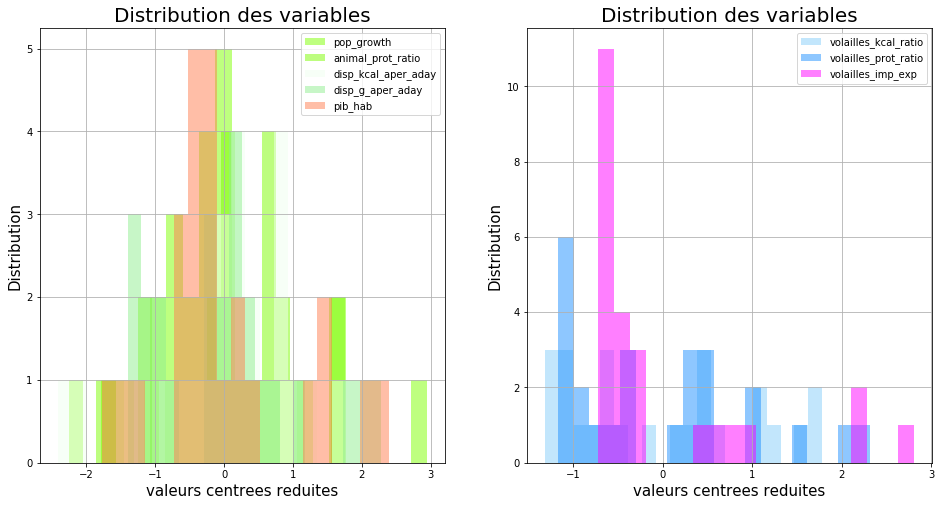

In [84]:
fig1_1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = [
    'chartreuse',
    'lawngreen',
    'honeydew',
    'lightgreen',
    'coral',
    'lightskyblue',
    'dodgerblue',
    'magenta'   
]

color_map = dict(zip(vars_lst, colors))

for var in vars_lst[0:5]:
    data_centered_reduxed[var].hist(density=False, 
                label=var,
                color=color_map[var],
                bins=20,
                alpha=0.5,
                ax=ax1)
    
ax1.set_title("Distribution des variables", fontsize=20)
ax1.set_xlabel("valeurs centrees reduites", fontsize=15)
ax1.set_ylabel("Distribution", fontsize=15)
ax1.get_legend()
ax1.legend()

for var in vars_lst[5:]:
    data_centered_reduxed[var].hist(density=False, 
                label=var,
                color=color_map[var],
                bins=20,
                alpha=0.5,
                ax=ax2)
    
ax2.set_title("Distribution des variables", fontsize=20)
ax2.set_xlabel("valeurs centrees reduites", fontsize=15)
ax2.set_ylabel("Distribution", fontsize=15)
ax2.get_legend()
ax2.legend()

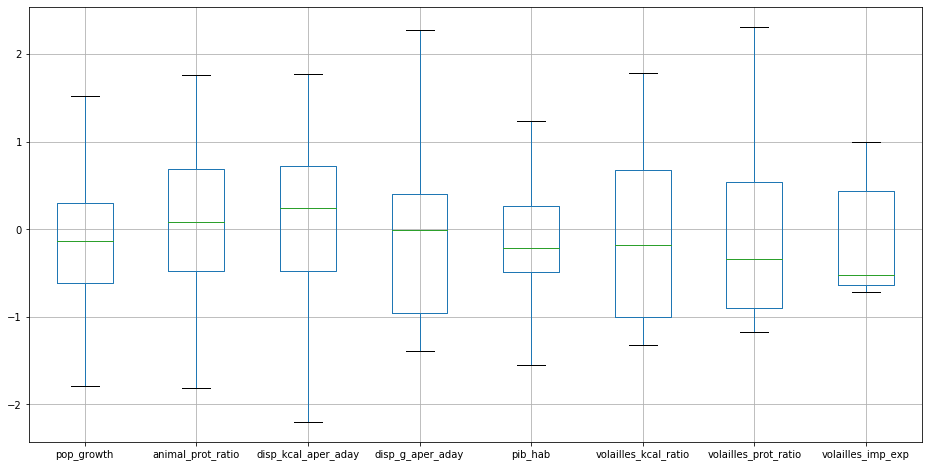

In [85]:
fig1_2, ax1 = plt.subplots(figsize=(16,8))
data_centered_reduxed.boxplot(showfliers=False, ax=ax1)

In [86]:
Z_acp = linkage(X_acp_scaled, 'ward')

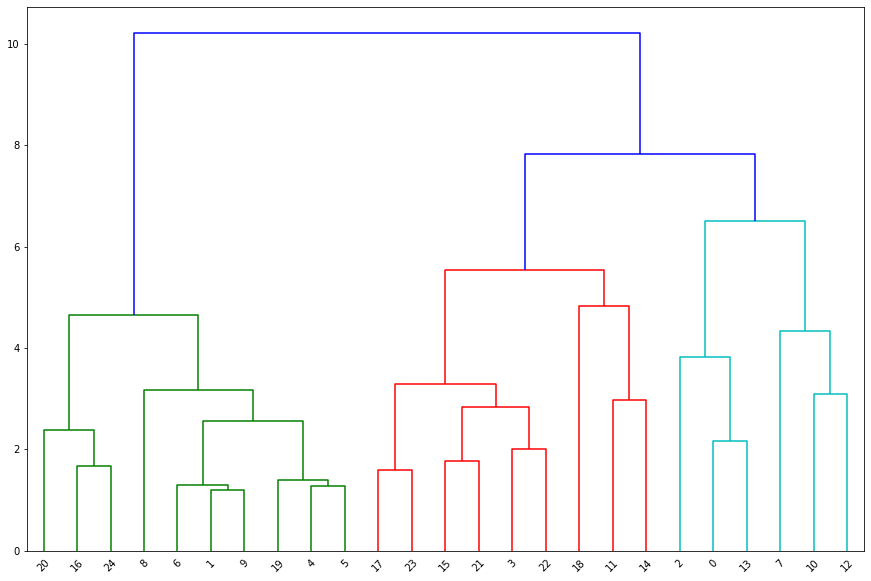

In [87]:
fig1_1_acp = plt.figure(figsize=(15, 10))
plt.axhline(12)
dendrogram(Z_acp, labels=None)
plt.show()

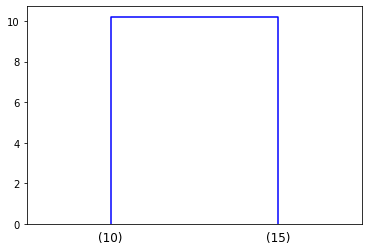

In [88]:
dendrogram(Z_acp, truncate_mode='lastp', p=2)
plt.show()

In [89]:
clusters_acp = fcluster(Z_acp, 2, criterion='maxclust')
clusters_acp

array([2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 1], dtype=int32)

In [90]:
# On reassocie les noms de pays avec leur numero de cluster
df_cluster_acp = pd.DataFrame({'country': countries_target, 'cluster': clusters_acp})
df_cluster_acp

,country,cluster
0,Australie,2
1,Autriche,1
2,Bermudes,2
3,Canada,2
4,Danemark,1
5,Finlande,1
6,Allemagne,1
7,Chine - RAS de Hong-Kong,2
8,Islande,1
9,Irlande,1


In [91]:
import seaborn as sns
cm = sns.light_palette("blue", as_cmap=True)
df_target_final = df_target_acp.merge(df_cluster_acp, on='country', how='left')
df_target_final.sort_values(by='cluster_y', kind='heapsort').style.background_gradient(cmap=cm).hide_columns('cluster_x').hide_index()

country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster_y
Islande,2.910000,72.250000,3380.000000,133.540000,49027.815665,2.720000,8.150000,1.000000,1
Norvège,5.090000,59.500000,3485.000000,110.900000,103110.441896,2.070000,7.720000,2.000000,1
Suisse,5.140000,64.210000,3391.000000,93.080000,84659.015399,1.680000,7.160000,52.000000,1
Finlande,1.540000,62.040000,3368.000000,117.720000,49659.588178,2.110000,6.960000,3.000000,1
Allemagne,2.400000,60.520000,3499.000000,101.590000,46176.177749,1.860000,7.150000,112.000000,1
Autriche,3.920000,59.180000,3768.000000,106.210000,50137.519579,1.750000,7.220000,38.000000,1
Luxembourg,11.370000,63.330000,3539.000000,113.880000,113341.237463,2.120000,6.720000,9.000000,1
Danemark,2.020000,64.130000,3367.000000,108.880000,60942.805627,2.910000,9.770000,-21.000000,1
Irlande,4.400000,58.920000,3600.000000,110.020000,51023.486060,2.670000,9.860000,27.000000,1
Suède,3.680000,65.750000,3179.000000,107.720000,60254.372213,1.950000,6.670000,57.000000,1


In [92]:
df_target_final.pivot_table(index='cluster_y', aggfunc='mean')

,animal_prot_ratio,cluster_x,disp_g_aper_aday,disp_kcal_aper_aday,pib_hab,pop_growth,volailles_imp_exp,volailles_kcal_ratio,volailles_prot_ratio
cluster_y,,,,,,,,,
1,62.983000,5,110.354000,3457.6,66833.245983,4.247000,28.000000,2.184000,7.738000
2,55.558667,5,101.490667,3200.6,45826.314998,5.427333,308.733333,4.409333,13.485333


In [93]:
def color_low_imp_exp(val):
    color = 'red' if val < 20 else 'black'
    return 'color: %s' % color

In [94]:
cluster2_msk = df_target_final['cluster_y'] == 2
cluster1_msk = df_target_final['cluster_y'] == 1
df_target_final.loc[cluster2_msk].style.hide_columns(['cluster_x', 'cluster_y']).applymap(color_low_imp_exp, subset=['volailles_imp_exp'])

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
0,Australie,7.070000,67.440000,3276.000000,106.280000,66544.670956,5.680000,15.110000,-21.000000
2,Bermudes,-2.530000,66.390000,2671.000000,90.790000,89968.618136,4.040000,13.330000,4.000000
3,Canada,5.040000,52.120000,3494.000000,104.950000,52264.959967,4.150000,12.460000,36.000000
7,Chine - RAS de Hong-Kong,3.990000,73.080000,3290.000000,129.180000,38566.712121,5.990000,15.160000,380.000000
10,Israël,8.360000,56.560000,3610.000000,128.140000,37452.126321,6.010000,20.120000,-8.000000
11,Japon,-0.870000,55.240000,2726.000000,87.730000,40180.809978,2.350000,7.920000,1047.000000
12,Koweït,17.320000,49.500000,3501.000000,108.240000,48401.609794,5.110000,16.870000,136.000000
13,Chine - RAS de Macao,9.400000,64.420000,2915.000000,94.840000,89525.344880,4.970000,12.700000,17.000000
14,Mexique,6.200000,46.400000,3072.000000,87.630000,10400.569944,3.710000,9.790000,839.000000
15,Nouvelle-Zélande,4.970000,59.230000,3137.000000,92.540000,42232.040825,4.460000,13.260000,-12.000000


In [95]:
df_target_final.loc[cluster1_msk].style.hide_columns(['cluster_x', 'cluster_y'])

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp
1,Autriche,3.920000,59.180000,3768.000000,106.210000,50137.519579,1.750000,7.220000,38.000000
4,Danemark,2.020000,64.130000,3367.000000,108.880000,60942.805627,2.910000,9.770000,-21.000000
5,Finlande,1.540000,62.040000,3368.000000,117.720000,49659.588178,2.110000,6.960000,3.000000
6,Allemagne,2.400000,60.520000,3499.000000,101.590000,46176.177749,1.860000,7.150000,112.000000
8,Islande,2.910000,72.250000,3380.000000,133.540000,49027.815665,2.720000,8.150000,1.000000
9,Irlande,4.400000,58.920000,3600.000000,110.020000,51023.486060,2.670000,9.860000,27.000000
16,Norvège,5.090000,59.500000,3485.000000,110.900000,103110.441896,2.070000,7.720000,2.000000
19,Suède,3.680000,65.750000,3179.000000,107.720000,60254.372213,1.950000,6.670000,57.000000
20,Suisse,5.140000,64.210000,3391.000000,93.080000,84659.015399,1.680000,7.160000,52.000000
24,Luxembourg,11.370000,63.330000,3539.000000,113.880000,113341.237463,2.120000,6.720000,9.000000


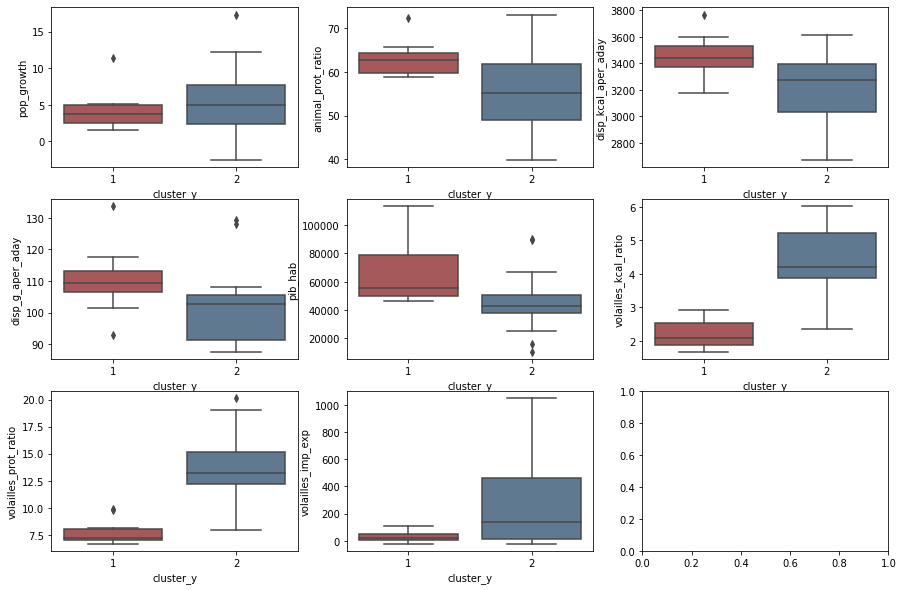

In [96]:
import seaborn as sns
_, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for f, ax in zip(df_target_final.loc[:,"pop_growth":"volailles_imp_exp"].columns, axes.ravel()):
        _ = sns.boxplot(
        data=df_target_final, 
        y=f, 
        x='cluster_y', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )


In [97]:
target_imp_exp_msk = df_target_final['volailles_imp_exp'] > 20
df_target_final.loc[cluster2_msk & target_imp_exp_msk].style.hide_columns(subset=pd.IndexSlice[:,'pop_growth':'cluster_y'])

,country
3,Canada
7,Chine - RAS de Hong-Kong
11,Japon
12,Koweït
14,Mexique
17,Fédération de Russie
18,Arabie saoudite
21,"Chine, Taiwan Province de"
22,Émirats arabes unis
23,Royaume-Uni


In [98]:
df_final = df_target_final.loc[cluster2_msk & target_imp_exp_msk]
selection_lst = df_final['country'].tolist()

boxplot sur les donnees centrees rduites (meme sur X)

# ACP

In [99]:
from sklearn import decomposition
from functions import *

In [100]:
df_data_4

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
0,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0,4
1,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0,1
2,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0,4
3,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0,4
4,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0,2
...,...,...,...,...,...,...,...,...,...,...
165,Belgique,2.94,58.36,3733.0,99.59,46713.438406,1.15,4.38,-246.0,5
166,Luxembourg,11.37,63.33,3539.0,113.88,113341.237463,2.12,6.72,9.0,5
167,Serbie,-1.30,48.56,2728.0,82.22,6351.678982,1.36,4.39,8.0,4
168,Monténégro,0.23,56.31,3491.0,112.07,7119.391447,1.52,4.92,7.0,4


In [101]:
df_acp = df_data_4.set_index('country')
df_acp.shape

(170, 9)

In [102]:
df_acp.drop('cluster', axis=1, inplace=True)

In [103]:
variables = df_acp.columns

In [104]:
acp_countries_lst = df_acp.index
acp_countries_index = acp_countries_lst.tolist()
n_comp = 8 # 8 variables

In [105]:
X_ACP = df_acp.values
X_ACP.shape

(170, 8)

In [106]:
acp_std_scale = preprocessing.StandardScaler().fit(X_ACP)
acp_X_scaled = acp_std_scale.transform(X_ACP)

In [107]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(acp_X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

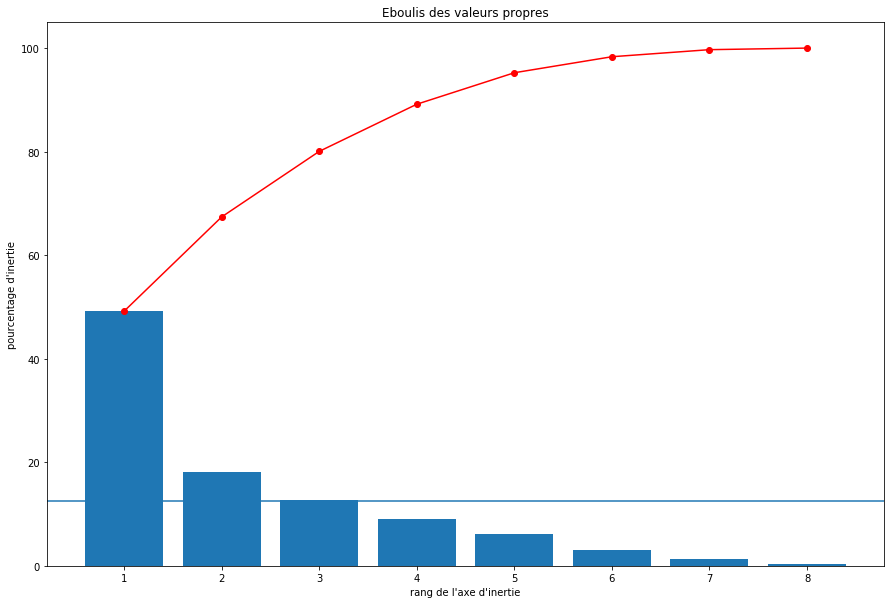

In [108]:
fig3_1 = plt.figure(figsize=(15, 10))
plt.axhline(12.5)
display_scree_plot(pca)

A priori les deux premiers plans suffisent le 4 eme axe etant a moins de 12.5 pourcent, soit 100 / p 

In [109]:
X_projected = pca.transform(acp_X_scaled)
pcs = pca.components_
pcs

array([[-0.30571508,  0.45118691,  0.38635886,  0.41726674,  0.34789628,
         0.35888653,  0.35944451,  0.0234999 ],
       [ 0.09579829,  0.01728348, -0.39241283, -0.34374394, -0.24526654,
         0.55387811,  0.55062742,  0.21965668],
       [ 0.28057473, -0.07069617,  0.1013794 ,  0.11853984,  0.20187649,
        -0.09905444, -0.07546064,  0.91416092],
       [ 0.80330312,  0.04797525, -0.04806464,  0.04229751,  0.47111722,
         0.10178787,  0.08944145, -0.32862016],
       [-0.34087711,  0.25184994, -0.49536296, -0.36376559,  0.63444861,
        -0.12630854, -0.14322988,  0.06058753],
       [ 0.21213391,  0.76959651, -0.30851916,  0.21860291, -0.38604667,
        -0.09612731, -0.24173174,  0.05515782],
       [-0.10927533, -0.36355599, -0.54267203,  0.67457752,  0.06634206,
         0.2701126 , -0.16889935, -0.02119208],
       [ 0.01427595,  0.03085365,  0.22156159, -0.23816031,  0.01219049,
         0.66790106, -0.6681609 ,  0.01884046]])

In [110]:
# Reformation d'un dataFrame 
df_acp_scaled = pd.DataFrame(acp_X_scaled)
df_acp_scaled['country'] = acp_countries_lst
df_acp_scaled['cluster'] = df_data_4['cluster']
df_acp_scaled

,0,1,2,3,4,5,6,7,country,cluster
0,-0.800303,0.342113,0.199480,0.451522,-0.525850,-0.462800,-0.524968,-0.033993,Arménie,4
1,1.336607,-1.350561,-1.751498,-1.154734,-0.677418,-0.988316,-1.096466,0.056922,Afghanistan,1
2,-1.215813,0.673764,0.816436,1.531791,-0.500288,-0.197674,-0.619135,-0.073768,Albanie,4
3,0.619491,-0.963217,1.056234,0.548534,-0.447849,-0.817879,-0.935732,-0.198776,Algérie,4
4,1.856396,-0.652842,-0.859822,-1.204756,-0.458044,-0.079315,0.317666,1.727486,Angola,2
...,...,...,...,...,...,...,...,...,...,...
165,-0.628644,0.988520,2.073630,0.934055,1.528718,-0.647441,-0.627253,-1.613642,Belgique,5
166,0.723769,1.299521,1.621972,1.656087,4.721904,-0.188206,-0.247337,-0.164683,Luxembourg,5
167,-1.308862,0.375278,-0.266147,0.056400,-0.405648,-0.548019,-0.625629,-0.170365,Serbie,4
168,-1.063406,0.860240,1.510221,1.564633,-0.368855,-0.472269,-0.539580,-0.176048,Monténégro,4


In [111]:
df_acp_centroids = pd.pivot_table(df_acp_scaled, index='cluster', aggfunc='mean')
#df_acp_centroids = df_acp_centroids.reset_index()
df_acp_centroids

,0,1,2,3,4,5,6,7
cluster,,,,,,,,
1,0.772896,-1.221933,-1.119745,-1.119230,-0.636534,-0.882056,-0.911739,-0.139303
2,0.635400,-0.033724,-0.295055,-0.304504,-0.432248,-0.150857,-0.088362,0.127950
3,-0.523907,0.797783,-0.119253,0.070740,-0.031540,1.929416,1.844675,-0.015864
4,-0.912525,0.311893,0.802184,0.665670,-0.119156,-0.152986,-0.138043,-0.444912
5,-0.342190,0.987407,1.134270,1.205536,1.842691,0.402891,0.412254,0.749518


In [112]:
df_acp_centroids.values

array([[ 0.772896  , -1.22193303, -1.11974533, -1.11923027, -0.63653355,
        -0.8820558 , -0.91173902, -0.13930281],
       [ 0.63539973, -0.03372423, -0.29505476, -0.30450358, -0.43224807,
        -0.15085663, -0.08836215,  0.12794957],
       [-0.52390743,  0.79778305, -0.11925275,  0.07074017, -0.03154017,
         1.92941628,  1.84467513, -0.01586398],
       [-0.91252489,  0.31189305,  0.8021836 ,  0.66567041, -0.1191556 ,
        -0.15298646, -0.13804281, -0.4449123 ],
       [-0.34219014,  0.98740738,  1.13427006,  1.20553558,  1.84269122,
         0.40289085,  0.41225447,  0.74951814]])

In [113]:
Centroids_projected = pca.transform(df_acp_centroids.values)
Centroids_projected

array([[-2.55624603e+00,  1.19955978e-02, -4.26258065e-02,
         1.43292673e-01,  2.20323129e-01, -1.32408108e-01,
         8.88904042e-02,  1.47456772e-03],
       [-6.83795844e-01,  2.82652031e-01,  1.65969660e-01,
         2.41157679e-01, -2.02935991e-01,  3.43087188e-01,
        -1.59677890e-01, -2.93975759e-02],
       [ 1.84771318e+00,  2.07472010e+00, -5.58286693e-01,
        -2.21229480e-02, -1.16035917e-01, -6.49968940e-02,
         8.74851919e-02,  2.93019263e-02],
       [ 8.50954852e-01, -8.54884119e-01, -5.23053077e-01,
        -6.66319425e-01, -3.13369827e-01,  1.40175439e-02,
        -1.64350780e-02, -3.98724134e-03],
       [ 2.44283688e+00, -7.12375861e-01,  1.07823890e+00,
         4.68660429e-01,  4.69484149e-01, -2.07502164e-01,
         2.16661115e-02,  2.00034677e-02]])

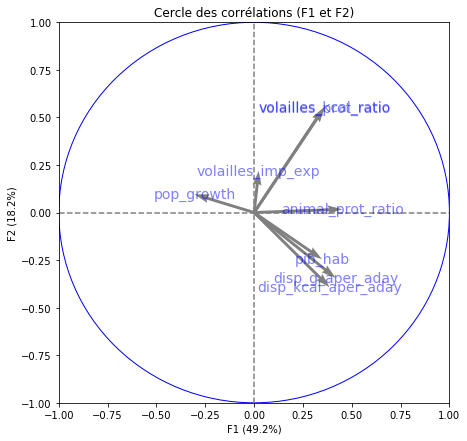

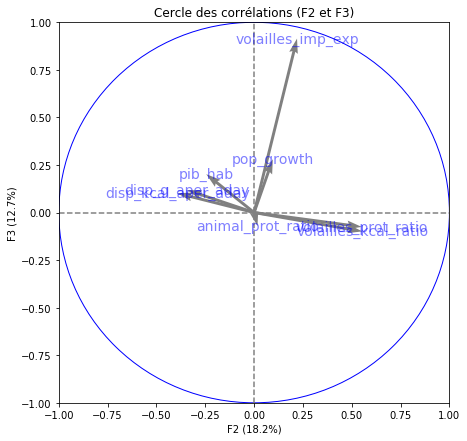

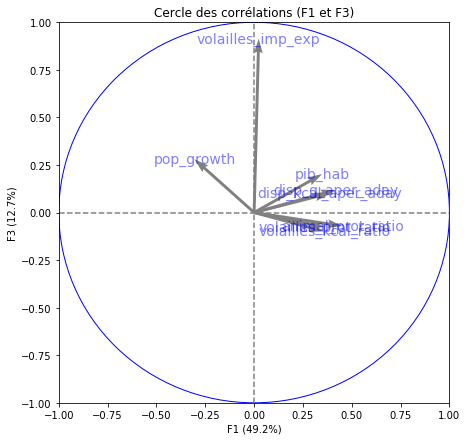

In [114]:
# Projections des variables sur le premier plan factoriel
display_circles(pcs,6,pca,[(0,1), (1,2), (0,2)],labels=variables)

# Visualisation des clusters sur les plans factoriels

In [115]:
X_projected

array([[ 0.1259678 , -0.72813102, -0.22675931, ...,  0.50319458,
         0.08890355, -0.02959941],
       [-3.15966057,  0.21644585,  0.25196813, ...,  0.15680452,
         0.38856581, -0.07030912],
       [ 1.16101955, -1.29565194, -0.22654241, ...,  0.70131077,
         0.49771233,  0.0936767 ],
       ...,
       [-0.07651787, -0.61980259, -0.55019865, ...,  0.45671532,
         0.12340917, -0.03566281],
       [ 1.4536845 , -1.72435696, -0.16850552, ...,  0.62107061,
        -0.01780014,  0.01061802],
       [-2.06516613, -0.45404025, -0.02075961, ...,  1.02489428,
         0.08173018, -0.05400279]])

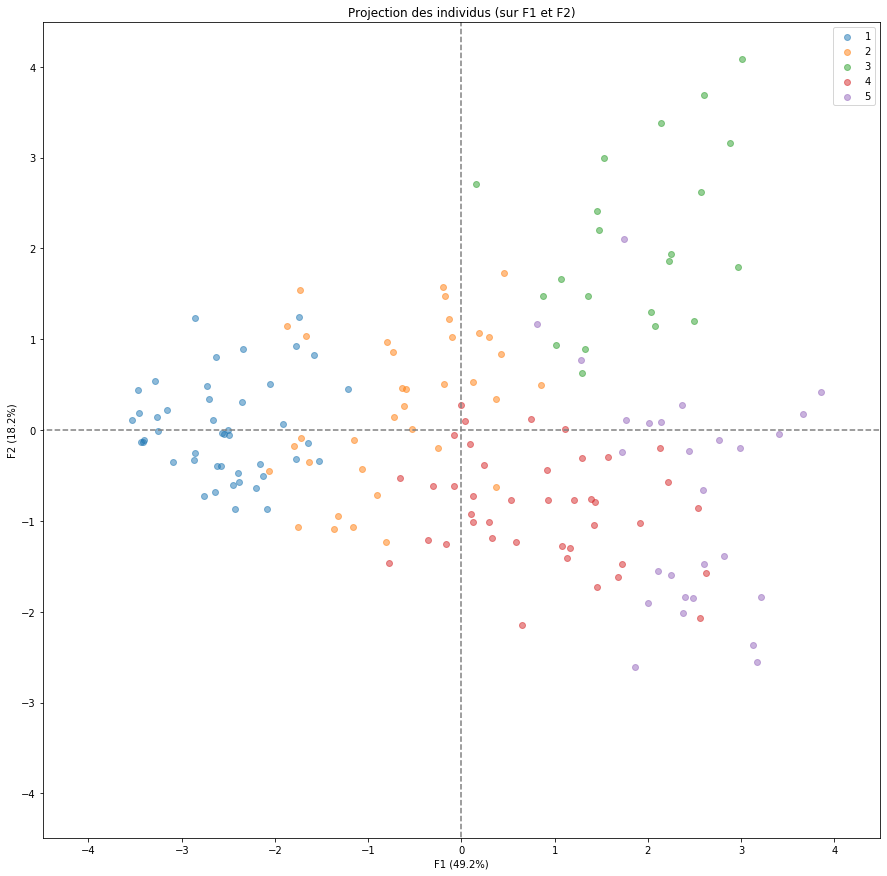

In [116]:
# Affichage des individus sur le premier plan factoriel
display_factorial_planes(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5,
    #labels=acp_countries_lst, 
    illustrative_var= df_data_4['cluster']
)

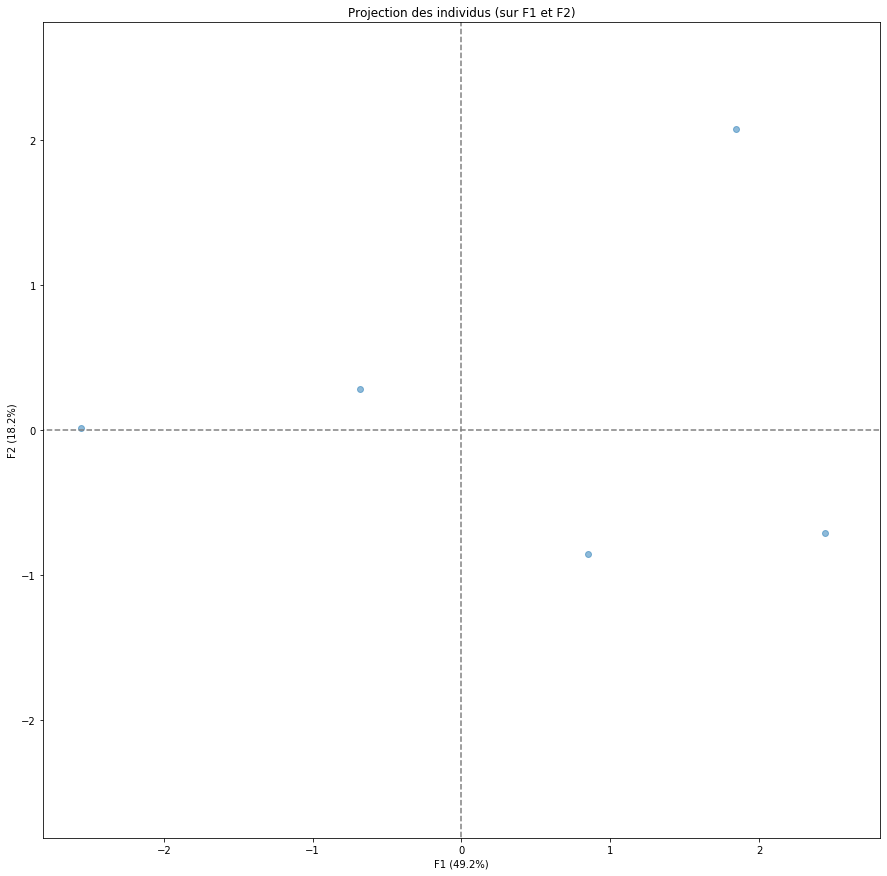

In [117]:
display_factorial_planes(
    Centroids_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    #illustrative_var=df_acp_centroids['cluster'],
    alpha = 0.5)

In [118]:
from functions import *

In [119]:
Centroids_projected[0,0]

-2.5562460260705016

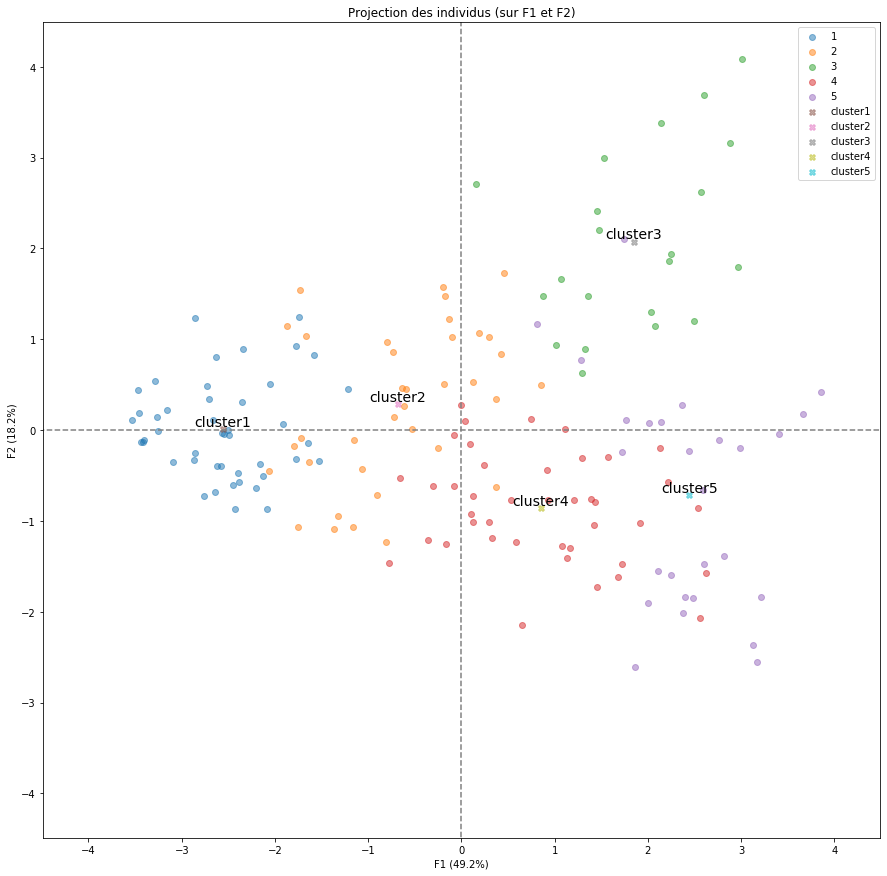

In [120]:
from functions import display_factorial_planes_custom
display_factorial_planes_custom(
    X_projected,
    Centroids_projected,
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5,
    #labels=acp_countries_lst, 
    illustrative_var= df_data_4['cluster'],
    centroids_list=['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
)

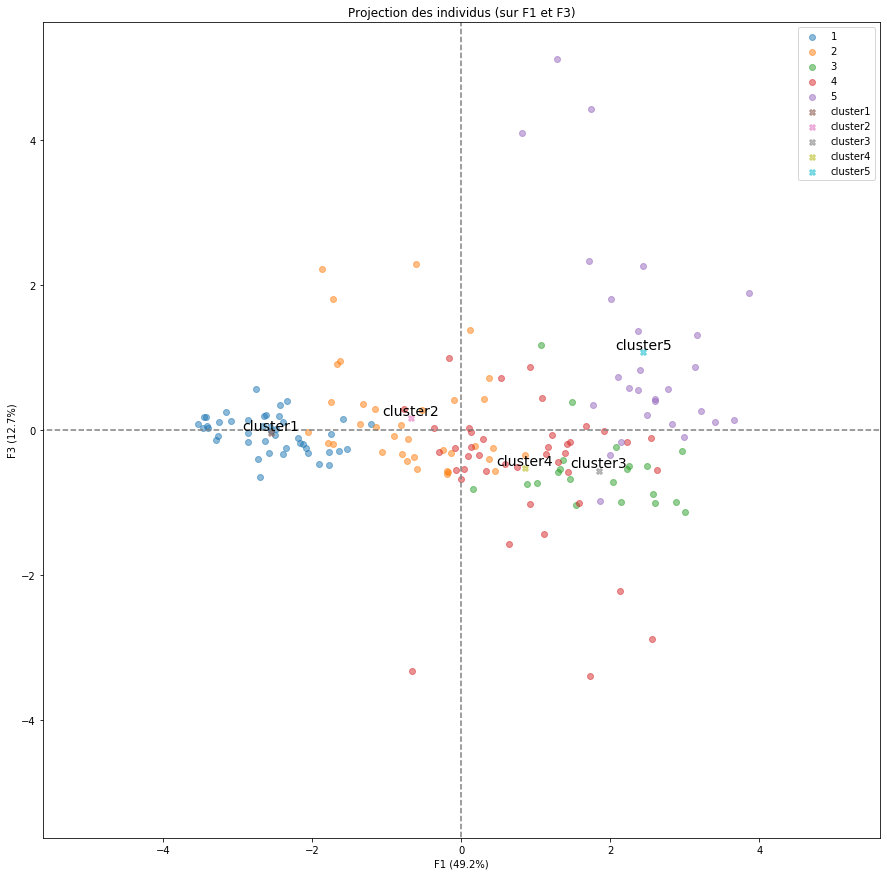

In [170]:
from functions import display_factorial_planes_custom
display_factorial_planes_custom(
    X_projected,
    Centroids_projected,
    n_comp, 
    pca, 
    [(0,2)], 
    alpha = 0.5,
    #labels=acp_countries_lst, 
    illustrative_var= df_data_4['cluster'],
    centroids_list=['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
)

## Recherche des pays representatifs de chaque cluster 


In [121]:
# recherche des pays proche des centroids pour comparaison des clusters sur le premier plan factoriel

df_centroids_f12 = pd.DataFrame(Centroids_projected[:, :2])
df_centroids_f12.columns = ['c_F1', 'c_F2']
df_centroids_f12.index = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']
df_centroids_f12['cluster'] = [1, 2, 3, 4, 5]
df_centroids_f12

,c_F1,c_F2,cluster
cluster1,-2.556246,0.011996,1
cluster2,-0.683796,0.282652,2
cluster3,1.847713,2.074720,3
cluster4,0.850955,-0.854884,4
cluster5,2.442837,-0.712376,5


In [122]:
df_acp_scaled['cluster']

0      4
1      1
2      4
3      4
4      2
      ..
165    5
166    5
167    4
168    4
169    2
Name: cluster, Length: 170, dtype: int32

In [123]:
df_acp_scaled_corrected_f12 = pd.DataFrame(X_projected[:, :2])
df_acp_scaled_corrected_f12['cluster'] = df_acp_scaled['cluster']
df_acp_scaled_corrected_f12['country'] = df_acp_scaled['country']
df_acp_scaled_corrected_f12
cols = ['country', 0, 1, 'cluster']
df_acp_scaled_f12 = df_acp_scaled_corrected_f12[cols]
df_acp_scaled_f12.columns = ['country', 'F1', 'F2', 'cluster']
df_acp_scaled_f12

,country,F1,F2,cluster
0,Arménie,0.125968,-0.728131,4
1,Afghanistan,-3.159661,0.216446,1
2,Albanie,1.161020,-1.295652,4
3,Algérie,-0.777354,-1.462401,4
4,Angola,-1.730024,1.540871,2
...,...,...,...,...
165,Belgique,1.865203,-2.611310,5
166,Luxembourg,3.165167,-2.548689,5
167,Serbie,-0.076518,-0.619803,4
168,Monténégro,1.453684,-1.724357,4


In [124]:
df_f12 = pd.merge(df_acp_scaled_f12, df_centroids_f12, on='cluster', how='left')
df_f12['dist_to_centroids'] = (df_f12['F1'] - df_f12['c_F1'])**2 + (df_f12['F2'] - df_f12['c_F2'])**2
df_f12

,country,F1,F2,cluster,c_F1,c_F2,dist_to_centroids
0,Arménie,0.125968,-0.728131,4,0.850955,-0.854884,0.541673
1,Afghanistan,-3.159661,0.216446,1,-2.556246,0.011996,0.405909
2,Albanie,1.161020,-1.295652,4,0.850955,-0.854884,0.290416
3,Algérie,-0.777354,-1.462401,4,0.850955,-0.854884,3.020466
4,Angola,-1.730024,1.540871,2,-0.683796,0.282652,2.677706
...,...,...,...,...,...,...,...
165,Belgique,1.865203,-2.611310,5,2.442837,-0.712376,3.939610
166,Luxembourg,3.165167,-2.548689,5,2.442837,-0.712376,3.893806
167,Serbie,-0.076518,-0.619803,4,0.850955,-0.854884,0.915469
168,Monténégro,1.453684,-1.724357,4,0.850955,-0.854884,1.119266


In [125]:
df_cluster_mask = df_f12['cluster'] == 3
df_f12.loc[df_cluster_mask]

,country,F1,F2,cluster,c_F1,c_F2,dist_to_centroids
5,Antigua-et-Barbuda,2.599907,3.690398,3,1.847713,2.07472,3.176209
9,Bahamas,2.249780,1.935162,3,1.847713,2.07472,0.181134
10,Barbade,2.028309,1.303296,3,1.847713,2.07472,0.627710
13,Bolivie (État plurinational de),0.152043,2.705009,3,1.847713,2.07472,3.272561
17,Brunéi Darussalam,2.961179,1.791676,3,1.847713,2.07472,1.319920
26,Chili,1.329086,0.887496,3,1.847713,2.07472,1.678474
36,Dominique,1.016687,0.942083,3,1.847713,2.07472,1.973472
45,Polynésie française,2.493611,1.199561,3,1.847713,2.07472,1.183088
55,Grenade,1.532994,2.993519,3,1.847713,2.07472,0.943239
58,Guyana,0.879438,1.475893,3,1.847713,2.07472,1.296151


In [126]:
df_min_dist = df_f12.pivot_table(index='cluster', values='dist_to_centroids', aggfunc=min)
df_countries_f12 = pd.merge(df_f12, df_min_dist, on='dist_to_centroids', how='right')
df_countries_f12

,country,F1,F2,cluster,c_F1,c_F2,dist_to_centroids
0,Canada,2.595544,-0.664793,5,2.442837,-0.712376,0.025584
1,Kazakhstan,0.923672,-0.770988,4,0.850955,-0.854884,0.012326
2,Sénégal,-2.569465,-0.034256,1,-2.556246,0.011996,0.002314
3,Venezuela (République bolivarienne du),1.479093,2.205520,3,1.847713,2.074720,0.152989
4,Viet Nam,-0.615491,0.265742,2,-0.683796,0.282652,0.004951


In [127]:
rep_countries = df_countries_f12['country'].tolist()
rep_countries

['Canada',
 'Kazakhstan',
 'Sénégal',
 'Venezuela (République bolivarienne du)',
 'Viet Nam']

<Figure size 1080x720 with 0 Axes>

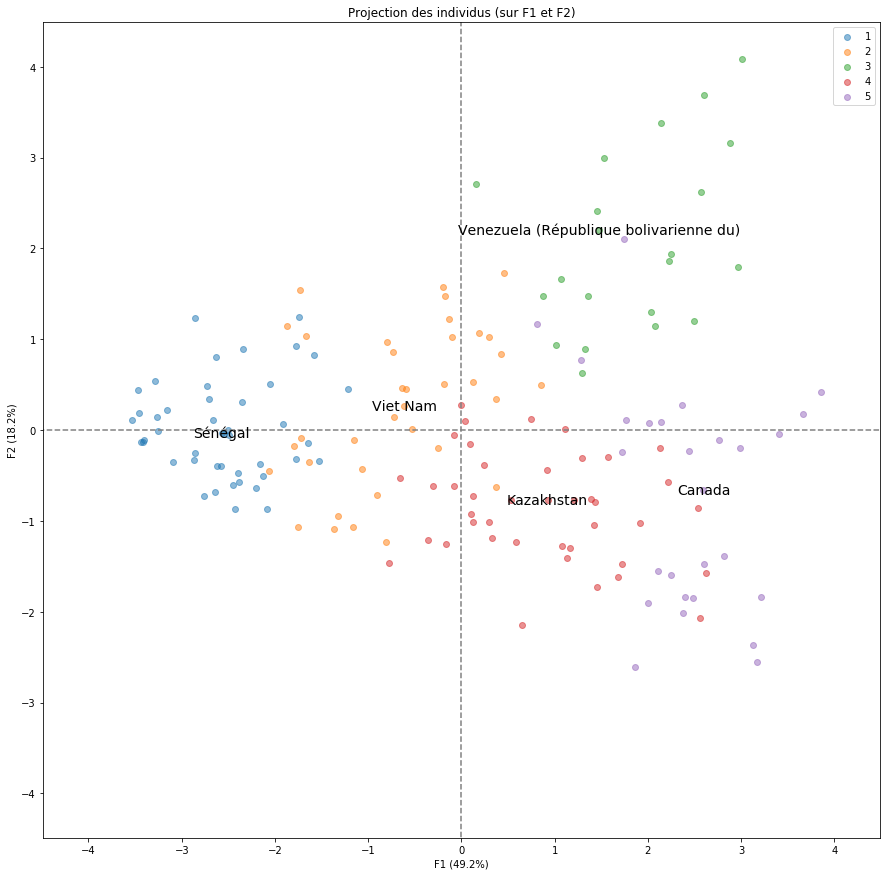

In [128]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=rep_countries
)
plt.show()

In [129]:
#df_data_4.loc[rep_countries,:]
rep_countries_mask = df_data_4['country'].isin(rep_countries)
df_data_4.loc[rep_countries_mask].sort_values('cluster')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
132,Sénégal,15.03,26.07,2456.0,58.49,1360.448500,0.61,2.67,0.0,1
160,Viet Nam,5.28,38.05,2745.0,81.61,1871.325494,1.68,4.95,500.0,2
159,Venezuela (République bolivarienne du),-3.00,52.21,2631.0,73.01,12248.175454,5.21,19.16,279.0,3
73,Kazakhstan,7.60,59.18,3264.0,96.41,13752.023575,1.90,6.43,168.0,4
21,Canada,5.04,52.12,3494.0,104.95,52264.959967,4.15,12.46,36.0,5


## Qualite de representation

Les precedents pays selectionnes (proximite aux centroids ne sont peut etre pas bien representes sur les axes du premier plan. Aussi evaluons la qualite de representation et la contribution des pays aux axes.

In [130]:
# Calcul des distances a l'origine des points dans leur coordonnees centrees reduites
o_dist = np.sum(X_projected**2, axis=1)
o_dist

array([ 1.76863933, 10.65282934,  5.62324406,  4.51267696,  9.36435261,
       22.99363909, 11.22471819, 14.80518027, 10.58250742,  9.81907571,
        6.5518271 ,  8.02253512, 19.10178933,  8.33302937,  3.88603437,
        2.18549825,  7.00280868, 13.86462548,  3.03772761,  1.28130795,
        7.10025316,  8.48378581,  0.86599245, 11.39323162,  4.89628465,
       12.87099468,  3.16079301,  2.21632562,  1.90132959,  5.86885611,
        0.89035121,  4.31255102,  2.18894819,  2.3126366 ,  5.61901343,
       10.981083  ,  3.06462062,  3.02616507,  4.42047159,  4.53417592,
        6.45802205,  1.62885633,  3.76553386,  1.09550977, 10.04301314,
        8.12825358,  5.42695967,  2.64144216,  4.03626952,  7.71232693,
        7.74733539,  6.34480521,  4.67533832,  1.08352111,  6.6625897 ,
       12.58985884,  3.3029289 ,  8.71188616,  3.95779178,  8.85748808,
        1.78983801, 19.88187542,  3.91380129,  4.62556019, 15.18087242,
        6.95431284,  3.0709415 ,  1.98390985, 10.00321204,  9.53

In [131]:
o_dist2 = np.sum(acp_X_scaled**2, axis=1)
o_dist2

array([ 1.76863933, 10.65282934,  5.62324406,  4.51267696,  9.36435261,
       22.99363909, 11.22471819, 14.80518027, 10.58250742,  9.81907571,
        6.5518271 ,  8.02253512, 19.10178933,  8.33302937,  3.88603437,
        2.18549825,  7.00280868, 13.86462548,  3.03772761,  1.28130795,
        7.10025316,  8.48378581,  0.86599245, 11.39323162,  4.89628465,
       12.87099468,  3.16079301,  2.21632562,  1.90132959,  5.86885611,
        0.89035121,  4.31255102,  2.18894819,  2.3126366 ,  5.61901343,
       10.981083  ,  3.06462062,  3.02616507,  4.42047159,  4.53417592,
        6.45802205,  1.62885633,  3.76553386,  1.09550977, 10.04301314,
        8.12825358,  5.42695967,  2.64144216,  4.03626952,  7.71232693,
        7.74733539,  6.34480521,  4.67533832,  1.08352111,  6.6625897 ,
       12.58985884,  3.3029289 ,  8.71188616,  3.95779178,  8.85748808,
        1.78983801, 19.88187542,  3.91380129,  4.62556019, 15.18087242,
        6.95431284,  3.0709415 ,  1.98390985, 10.00321204,  9.53

In [132]:
cos2 = X_projected**2
cos2

array([[1.58678872e-02, 5.30174787e-01, 5.14197829e-02, ...,
        2.53204786e-01, 7.90384039e-03, 8.76124960e-04],
       [9.98345491e+00, 4.68488079e-02, 6.34879376e-02, ...,
        2.45876587e-02, 1.50983385e-01, 4.94337170e-03],
       [1.34796639e+00, 1.67871396e+00, 5.13214640e-02, ...,
        4.91836799e-01, 2.47717565e-01, 8.77532503e-03],
       ...,
       [5.85498511e-03, 3.84155255e-01, 3.02718557e-01, ...,
        2.08588879e-01, 1.52298242e-02, 1.27183622e-03],
       [2.11319861e+00, 2.97340692e+00, 2.83941096e-02, ...,
        3.85728698e-01, 3.16845129e-04, 1.12742388e-04],
       [4.26491113e+00, 2.06152546e-01, 4.30961203e-04, ...,
        1.05040829e+00, 6.67982250e-03, 2.91630130e-03]])

In [133]:
pd_dict = {}
for j in range(6):
    cos2[:,j] = cos2[:,j]/o_dist
    pd_dict.update({'Qual_F'+ str(j+1): cos2[:,j]})

In [134]:
df_rep_f12 = pd.DataFrame(pd_dict)
df_rep_f12

,Qual_F1,Qual_F2,Qual_F3,Qual_F4,Qual_F5,Qual_F6
0,0.008972,0.299764,0.029073,0.507694,0.006369,0.143164
1,0.937165,0.004398,0.005960,0.024199,0.011333,0.002308
2,0.239713,0.298531,0.009127,0.258537,0.061014,0.087465
3,0.133907,0.473913,0.019091,0.002743,0.338186,0.027004
4,0.319614,0.253545,0.348940,0.050424,0.002548,0.000989
...,...,...,...,...,...,...
165,0.282885,0.554466,0.078152,0.030331,0.001594,0.006081
166,0.333875,0.216483,0.057362,0.275129,0.098559,0.018191
167,0.002081,0.136551,0.107603,0.568894,0.104861,0.074144
168,0.290238,0.408383,0.003900,0.146171,0.098271,0.052978


In [135]:
df_rep_f12['cluster'] = df_acp_scaled['cluster']
df_rep_f12['country'] = df_acp_scaled['country']
cols = ['country', 'Qual_F1', 'Qual_F2', 'cluster']
df_rep_f12 = df_rep_f12[cols]
df_rep_f12

,country,Qual_F1,Qual_F2,cluster
0,Arménie,0.008972,0.299764,4
1,Afghanistan,0.937165,0.004398,1
2,Albanie,0.239713,0.298531,4
3,Algérie,0.133907,0.473913,4
4,Angola,0.319614,0.253545,2
...,...,...,...,...
165,Belgique,0.282885,0.554466,5
166,Luxembourg,0.333875,0.216483,5
167,Serbie,0.002081,0.136551,4
168,Monténégro,0.290238,0.408383,4


In [136]:
#df_data_4.loc[rep_countries,:]
rep_countries_mask = df_rep_f12['country'].isin(rep_countries)
df_rep_f12.loc[rep_countries_mask].sort_values('cluster')

,country,Qual_F1,Qual_F2,cluster
132,Sénégal,0.943841,0.000168,1
160,Viet Nam,0.047857,0.008921,2
159,Venezuela (République bolivarienne du),0.220267,0.489757,3
73,Kazakhstan,0.252576,0.175975,4
21,Canada,0.794085,0.052093,5


En dehors du Senegal et Canada les precedents pays selectionnes ne sont pas bien representes sur les axes F1 et F2

In [137]:
qual_mask1 = df_rep_f12['Qual_F1'] > 0.7
qual_mask2 = df_rep_f12['Qual_F2'] > 0.1
c1_mask = df_rep_f12['cluster'] == 1
c2_mask = df_rep_f12['cluster'] == 2
c3_mask = df_rep_f12['cluster'] == 3
c4_mask = df_rep_f12['cluster'] == 4
c5_mask = df_rep_f12['cluster'] == 5

df_rep_f1 = df_rep_f12.loc[qual_mask1]

In [138]:
df_rep_max_f1 = df_rep_f1.pivot_table(index='cluster', values='Qual_F1', aggfunc=max)
df_rep_max_f1

,Qual_F1
cluster,
1,0.982205
2,0.864920
3,0.764998
4,0.862620
5,0.866134


In [139]:
df_rep_f1 = pd.merge(df_rep_f12, df_rep_max_f1, on='Qual_F1', how='right')
df_rep_f1.sort_values('cluster')

,country,Qual_F1,Qual_F2,cluster
3,Sierra Leone,0.982205,7.569817e-07,1
2,Pérou,0.864920,3.550458e-02,2
0,Polynésie française,0.764998,1.770302e-01,3
4,Espagne,0.862620,5.809796e-02,4
1,Nouvelle-Zélande,0.866134,1.679348e-03,5


In [140]:
rep_f1_lst = df_rep_f1['country'].tolist()

In [141]:
df_rep_f2 = df_rep_f12.loc[qual_mask2]
df_rep_max_f2 = df_rep_f2.pivot_table(index='cluster', values='Qual_F2', aggfunc=max)
df_rep_max_f2

,Qual_F2
cluster,
1,0.263800
2,0.754847
3,0.878081
4,0.630000
5,0.554466


In [142]:
df_rep_f2 = pd.merge(df_rep_f12, df_rep_max_f2, on='Qual_F2', how='right')
df_rep_f2.sort_values('cluster')


,country,Qual_F1,Qual_F2,cluster
1,Congo,0.518454,0.263800,1
3,Suriname,0.051573,0.754847,2
0,Bolivie (État plurinational de),0.002774,0.878081,3
2,Azerbaïdjan,0.056587,0.630000,4
4,Belgique,0.282885,0.554466,5


In [143]:
rep_f2_lst = df_rep_f2['country'].tolist()


<Figure size 1080x720 with 0 Axes>

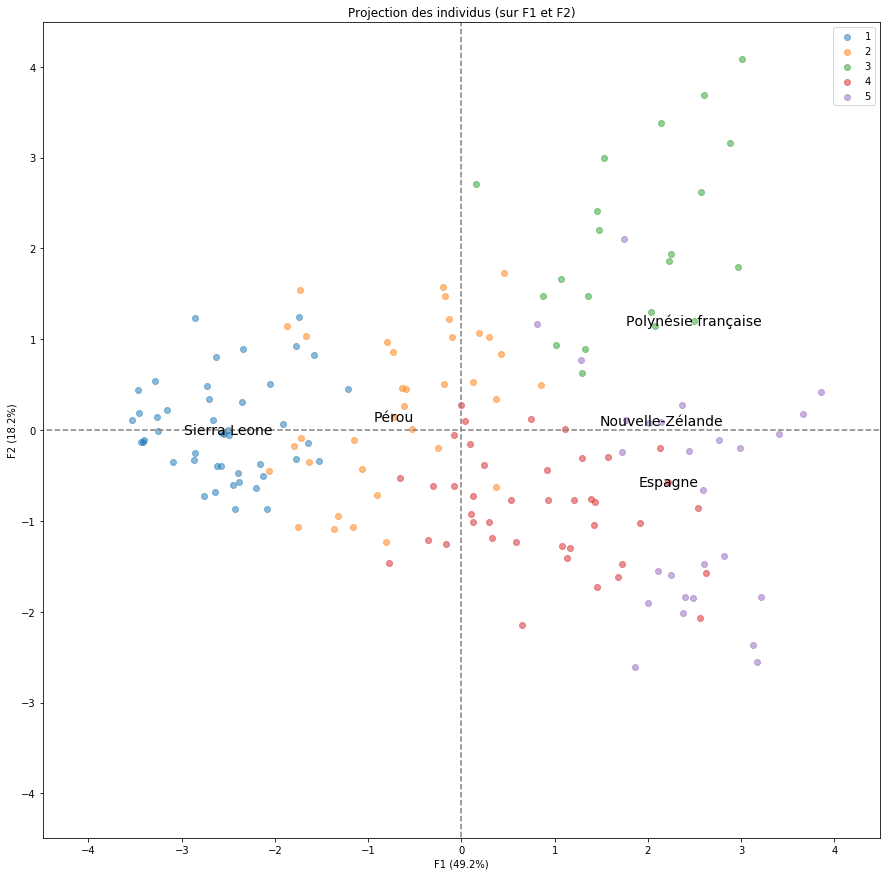

In [144]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=rep_f1_lst
)
plt.show()

In [145]:
#df_data_4.loc[rep_countries,:]
rep_countries_mask = df_data_4['country'].isin(rep_f1_lst)
df_data_4.loc[rep_countries_mask].sort_values('cluster')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
133,Sierra Leone,11.45,26.49,2404.0,56.13,710.818700,0.50,2.74,14.0,1
117,Pérou,7.44,36.09,2700.0,74.92,6583.118622,2.00,7.78,28.0,2
45,Polynésie française,2.72,65.89,2927.0,96.85,22045.687291,5.88,17.41,16.0,3
137,Espagne,-0.51,62.12,3174.0,104.88,29163.288417,3.09,11.16,30.0,4
108,Nouvelle-Zélande,4.97,59.23,3137.0,92.54,42232.040825,4.46,13.26,-12.0,5


<Figure size 1080x720 with 0 Axes>

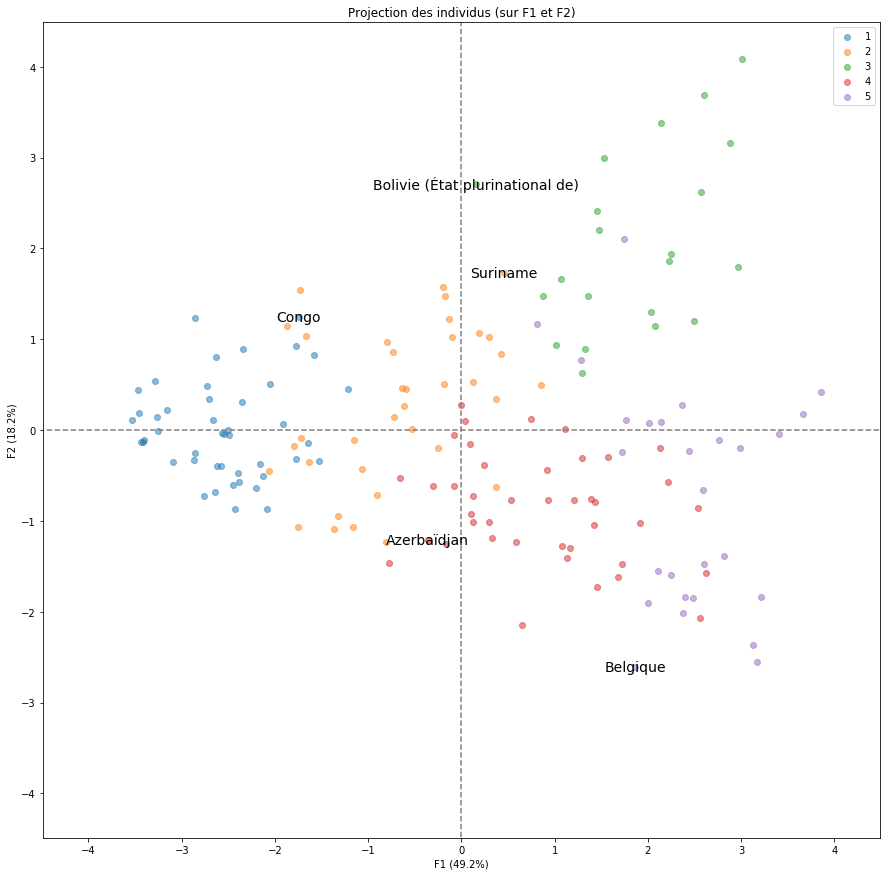

In [146]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=rep_f2_lst
)
plt.show()

In [147]:
#df_data_4.loc[rep_countries,:]
rep_countries_mask = df_data_4['country'].isin(rep_f2_lst)
df_data_4.loc[rep_countries_mask].sort_values('cluster')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
29,Congo,13.45,43.07,2208.0,51.66,3747.359134,1.99,8.73,51.0,1
138,Suriname,5.24,45.09,2753.0,62.94,9484.379870,4.61,16.83,21.0,2
13,Bolivie (État plurinational de),7.69,45.08,2256.0,66.01,2947.938522,6.56,16.53,-1.0,3
33,Azerbaïdjan,6.01,32.29,3118.0,93.15,7901.783462,1.12,3.82,5.0,4
165,Belgique,2.94,58.36,3733.0,99.59,46713.438406,1.15,4.38,-246.0,5


<Figure size 1080x720 with 0 Axes>

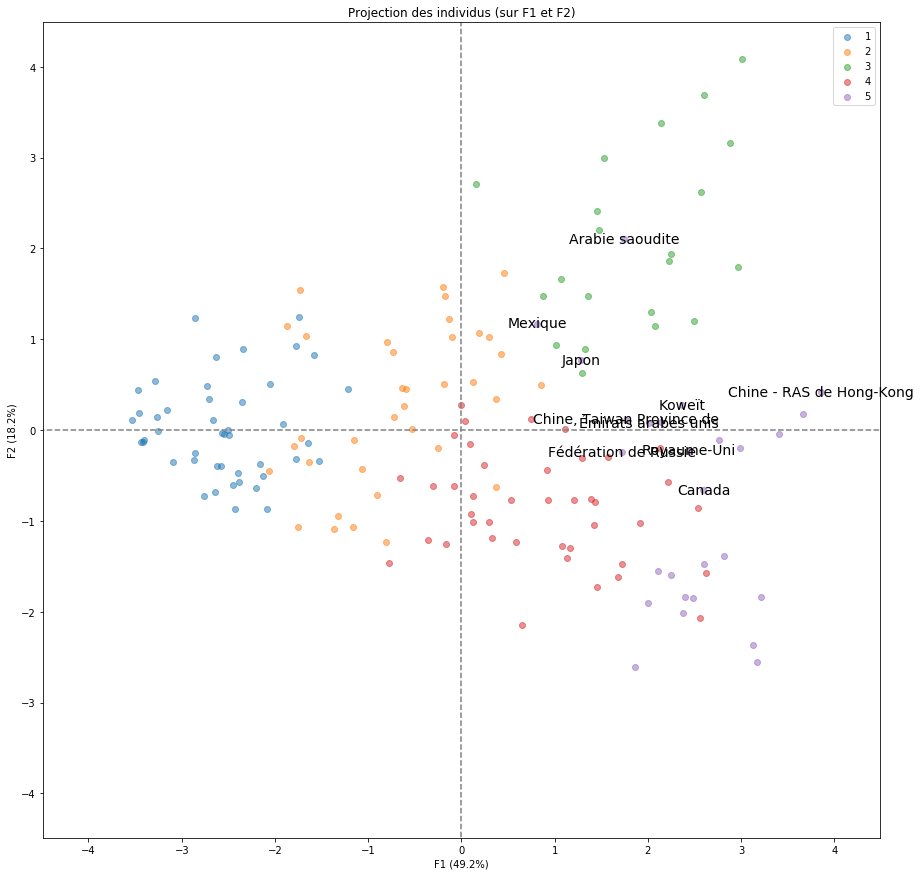

In [148]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=selection_lst
)
plt.show()

<Figure size 1080x720 with 0 Axes>

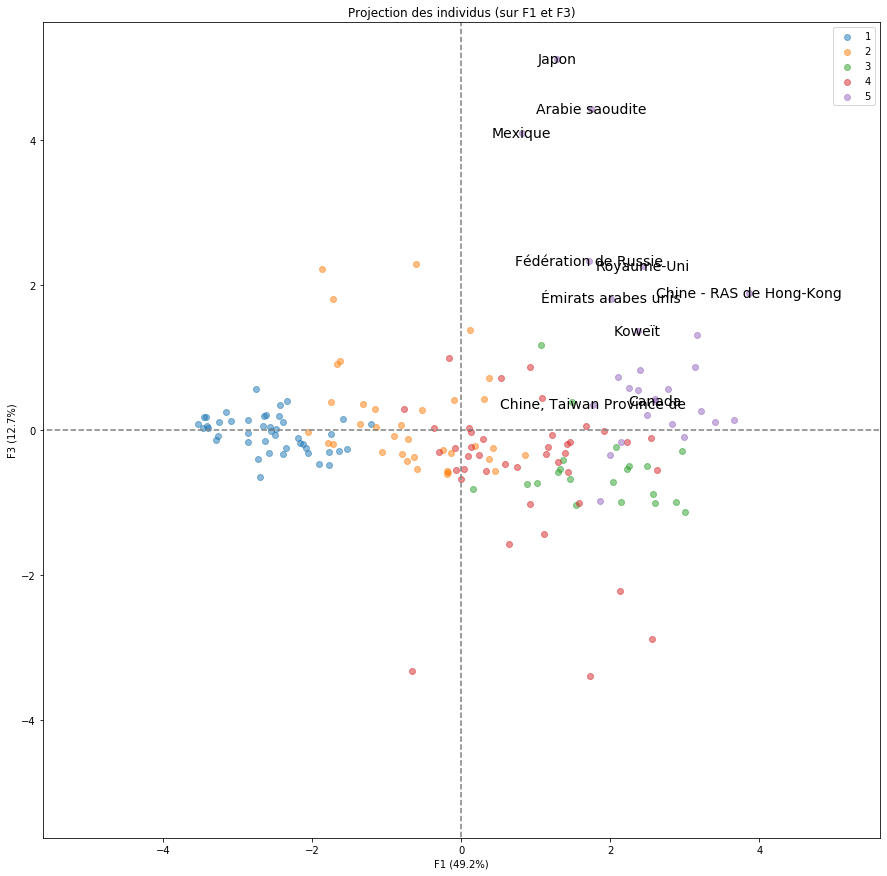

In [169]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,2)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=selection_lst
)
plt.show()

In [149]:
selection_lst
#df_data_4.loc[rep_countries,:]
rep_countries_mask = df_data_4['country'].isin(selection_lst)
df_data_4.loc[rep_countries_mask].sort_values('cluster')

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
21,Canada,5.04,52.12,3494.0,104.95,52264.959967,4.15,12.46,36.0,5
61,Chine - RAS de Hong-Kong,3.99,73.08,3290.0,129.18,38566.712121,5.99,15.16,380.0,5
75,Japon,-0.87,55.24,2726.0,87.73,40180.809978,2.35,7.92,1047.0,5
81,Koweït,17.32,49.50,3501.0,108.24,48401.609794,5.11,16.87,136.0,5
97,Mexique,6.20,46.40,3072.0,87.63,10400.569944,3.71,9.79,839.0,5
126,Fédération de Russie,0.98,54.63,3361.0,102.84,15997.000015,2.74,9.01,500.0,5
131,Arabie saoudite,12.15,43.58,3255.0,91.63,24934.386142,5.31,19.02,845.0,5
144,"Chine, Taiwan Province de",1.30,48.46,2997.0,89.74,45013.000000,4.14,11.91,109.0,5
152,Émirats arabes unis,4.71,39.86,3280.0,104.62,43315.138419,4.21,13.24,330.0,5
154,Royaume-Uni,3.32,56.47,3424.0,103.21,42597.737474,3.27,12.38,429.0,5


## Reprise de l'analyse

<Figure size 1080x720 with 0 Axes>

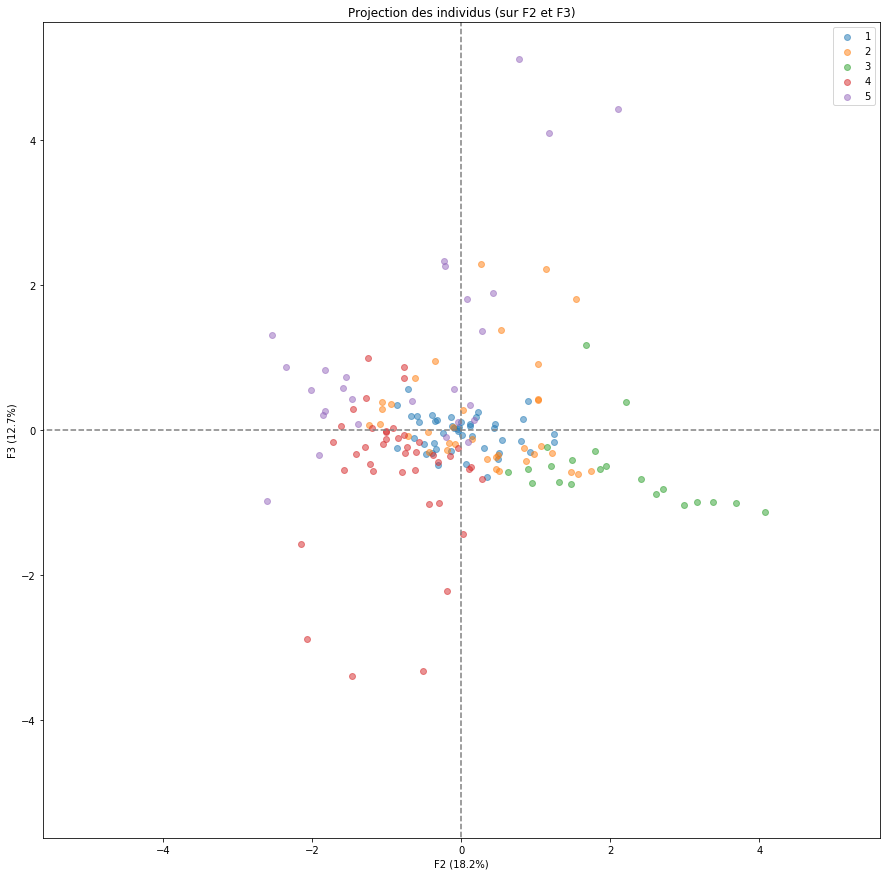

In [150]:
fig3_3 = plt.figure(figsize=(15, 10))
display_factorial_planes(X_projected, n_comp, pca, [(1,2)], alpha = 0.5, illustrative_var= df_data_4['cluster'])
plt.show()

<Figure size 1080x720 with 0 Axes>

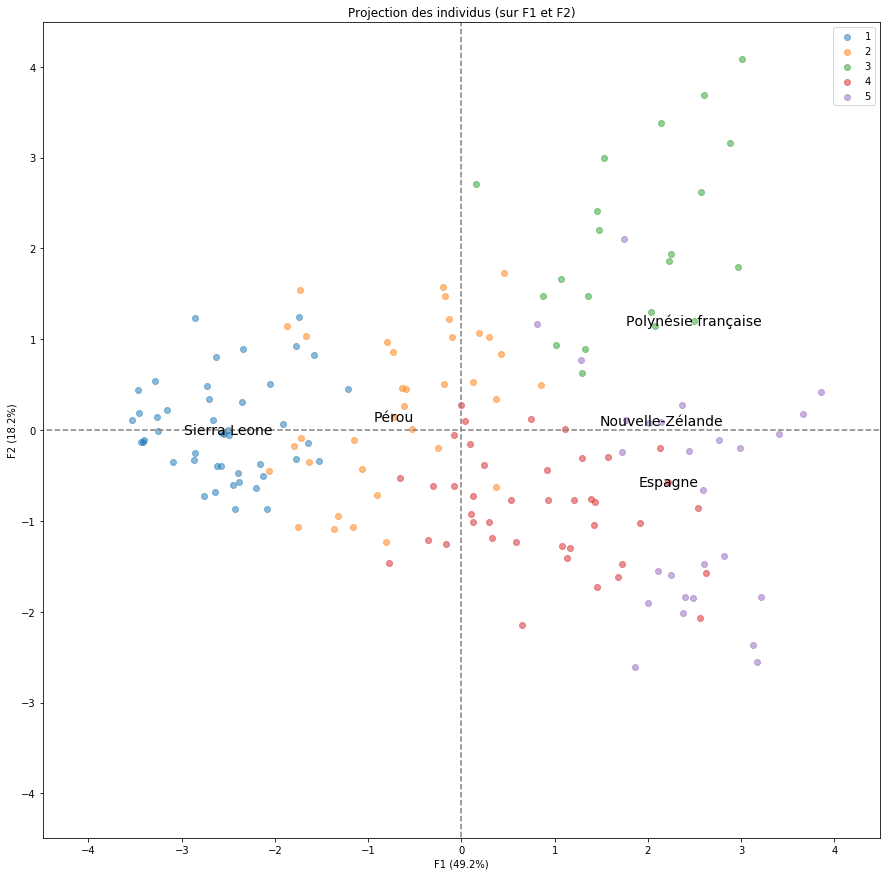

In [151]:
fig3_2 = plt.figure(figsize=(15, 10))
display_factorial_planes_filter(
    X_projected, 
    n_comp, 
    pca, 
    [(0,1)], 
    alpha = 0.5, 
    illustrative_var= df_data_4['cluster'],
    labels= acp_countries_lst,
    to_display_list=rep_f1_lst
)
plt.show()

Representation par cluster

<Figure size 1080x720 with 0 Axes>

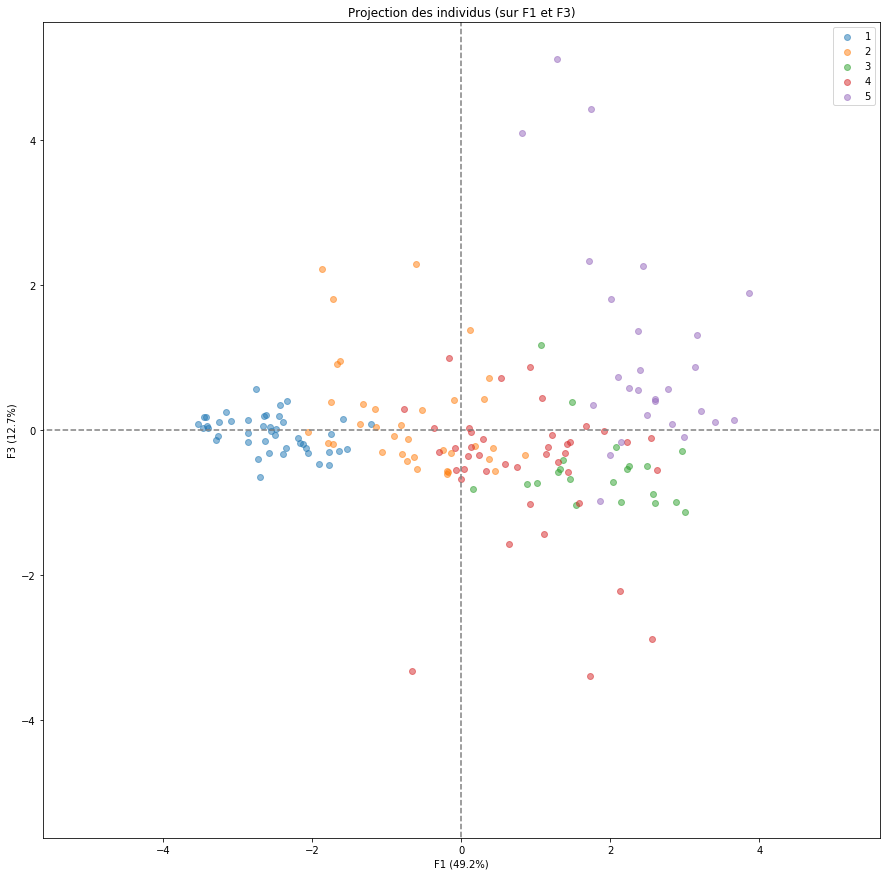

In [152]:
fig3_4 = plt.figure(figsize=(15, 10))
display_factorial_planes(X_projected, n_comp, pca, [(0,2)], alpha = 0.5, illustrative_var= df_data_4['cluster'])
plt.show()

In [153]:
df_data_4.head()

,country,pop_growth,animal_prot_ratio,disp_kcal_aper_aday,disp_g_aper_aday,pib_hab,volailles_kcal_ratio,volailles_prot_ratio,volailles_imp_exp,cluster
0,Arménie,1.87,48.03,2928.0,90.04,3843.590751,1.54,5.01,32.0,4
1,Afghanistan,15.19,20.98,2090.0,58.25,681.034215,0.43,1.49,48.0,1
2,Albanie,-0.72,53.33,3193.0,111.42,4376.970549,2.10,4.43,25.0,4
3,Algérie,10.72,27.17,3296.0,91.96,5471.123389,0.79,2.48,3.0,4
4,Angola,18.43,32.13,2473.0,57.26,5258.408495,2.35,10.20,342.0,2


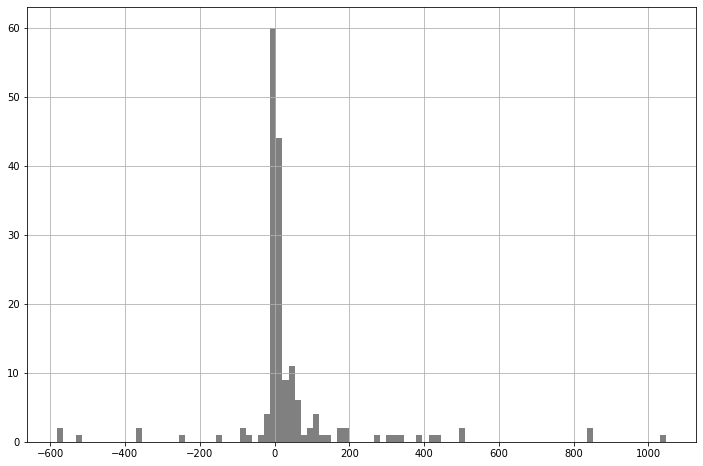

In [154]:
df_data_4['volailles_imp_exp'].hist(density=False,
                                 figsize=(12, 8),
                                 color='grey',
                                 bins = 100)

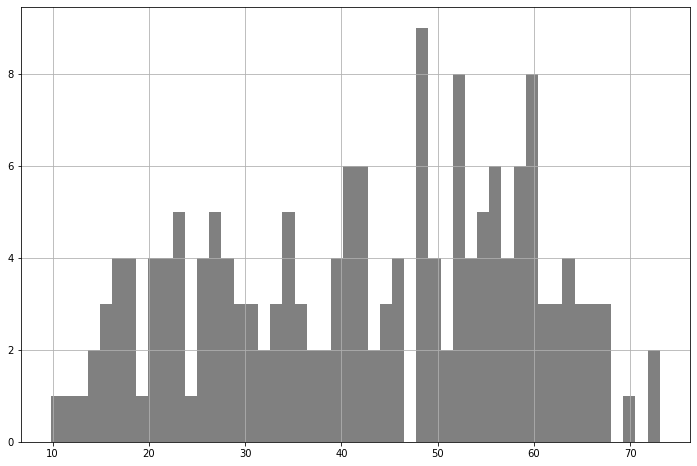

In [155]:
df_data_4['animal_prot_ratio'].hist(density=False,
                                 figsize=(12, 8),
                                 color='grey',
                                 bins = 50)

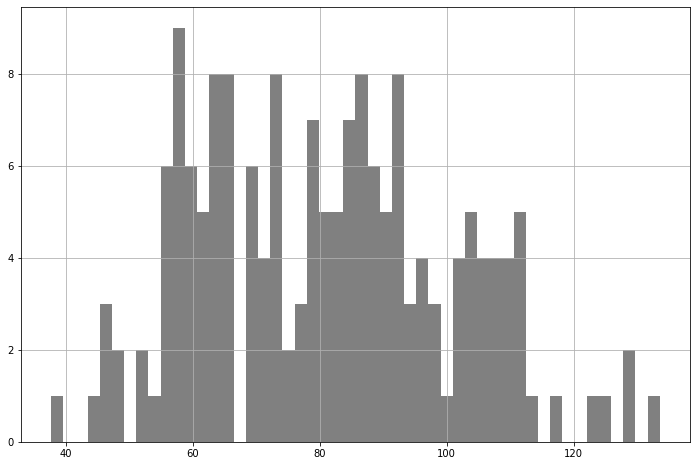

In [156]:
df_data_4['disp_g_aper_aday'].hist(density=False,
                                 figsize=(12, 8),
                                 color='grey',
                                 bins = 50)


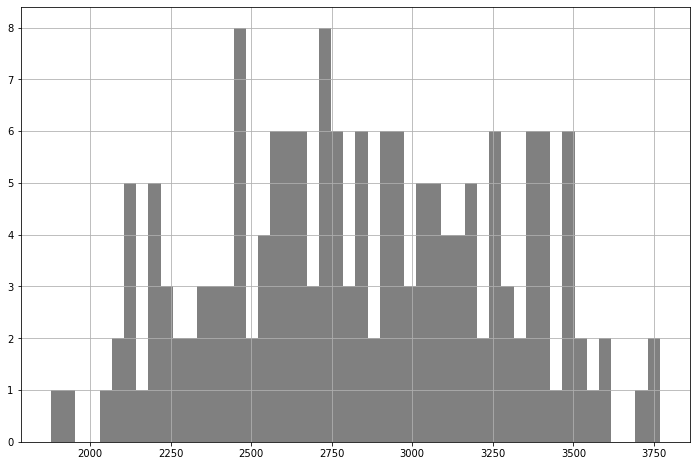

In [157]:
df_data_4['disp_kcal_aper_aday'].hist(density=False,
                                 figsize=(12, 8),
                                 color='grey',
                                 bins = 50)

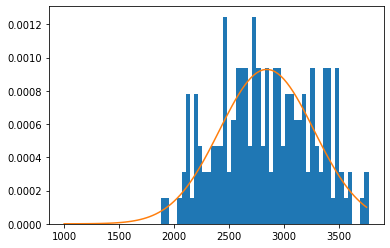

In [158]:
from scipy.stats import norm

var_moyenne = df_data_4['disp_kcal_aper_aday'].mean()
var_std = df_data_4['disp_kcal_aper_aday'].std(ddof=0)
var_moyenne, var_std
plt.hist(df_data_4['disp_kcal_aper_aday'], bins=50, density=True) # revoir ce que fait density
x_axis = np.arange(1000, 3750, 170)
x = np.linspace(1000, 3750, 100)

plt.plot(x, norm.pdf(x,var_moyenne,var_std))


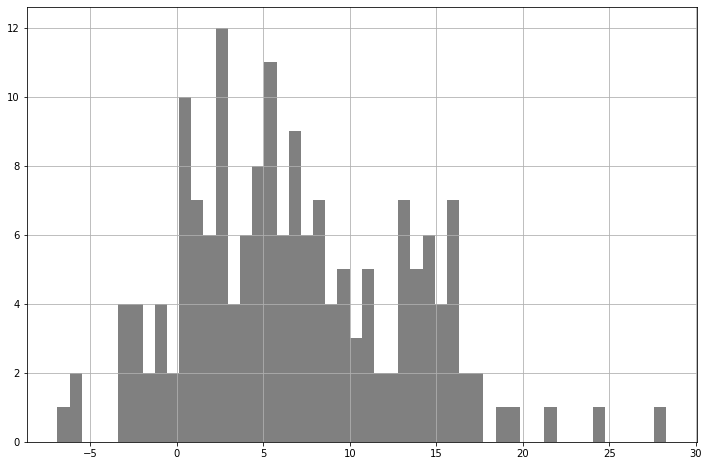

In [159]:
df_data_4['pop_growth'].hist(density=False,
                                 figsize=(12, 8),
                                 color='grey',
                                 bins = 50)

In [160]:
from scipy.stats import shapiro, ttest_ind


In [161]:
shapiro(df_data_4['volailles_imp_exp'])

(0.5962061285972595, 8.562765613526097e-20)

In [162]:
shapiro(df_data_4['animal_prot_ratio'])

(0.961577296257019, 0.0001247384789166972)

In [163]:

shapiro(df_data_4['disp_g_aper_aday'])

(0.9824930429458618, 0.030800489708781242)

In [164]:
shapiro(df_data_4['disp_kcal_aper_aday'])

(0.984174370765686, 0.05063069984316826)

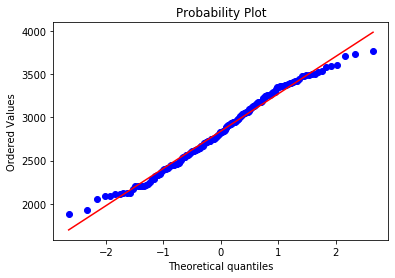

In [165]:
import scipy.stats as stats
import pylab
stats.probplot(df_data_4['disp_kcal_aper_aday'], dist="norm", plot=pylab)
pylab.show()
#sm.qqplot(df_data_4['disp_kcal_aper_aday'], line ='45') 

In [166]:
shapiro(df_data_4['pop_growth'])

(0.9799972772598267, 0.01488029770553112)

In [167]:
ttest_ind(df_data_4.loc[cluster5_mask]['disp_kcal_aper_aday'], df_data_4.loc[cluster1_mask]['disp_kcal_aper_aday'])

Ttest_indResult(statistic=16.065944662336396, pvalue=3.5144983607673574e-25)

In [168]:
ttest_ind(df_data_4.loc[cluster5_mask]['disp_kcal_aper_aday'], df_data_4.loc[cluster3_mask]['disp_kcal_aper_aday'])

Ttest_indResult(statistic=7.14710385683454, pvalue=5.484784970572042e-09)